### Importacion de librerias

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy import stats
import os
import sys
import re

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [6]:
# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
df = pd.read_excel('Data/DATA PBI FILTRADO.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269331 entries, 0 to 269330
Data columns (total 37 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   Nº_HC                                269227 non-null  float64       
 1   Fecha                                269331 non-null  datetime64[ns]
 2   Tipo_Paciente                        269331 non-null  object        
 3   Categoría                            269331 non-null  object        
 4   Sexo                                 269331 non-null  object        
 5   Edad                                 269331 non-null  object        
 6   Nº_Control                           269330 non-null  float64       
 7   Peso                                 269308 non-null  float64       
 8   Talla                                269286 non-null  float64       
 9   CabPC                                150853 non-null  float64       
 

In [16]:
df[df['flg_alguna']==1].head(100)

,Nº_HC,Fecha,Tipo_Paciente,Categoría,Sexo,Edad,Nº_Control,Peso,Talla,CabPC,Diag_Nacimiento,(M) - FG,(M) - FF,(C) - Cog,(L) - Len,(S) - Soc,Acompaña_control,Enfermera,flg_motora_gruesa,flg_motora_fina,flg_cognitivo,flg_lenguaje,flg_social,flg_total,flg_alguna,key,flg_desnutricion,Nro_Control_recreado,primer_Control_esperado,ultimo_Control,primer_alguna,distancia_primer_control_alguna,nro_Controles_primer_control_alguna,control_esperado,EdadMeses,Cantidad_controles,cant_controles_primer_Alguna
127,87356.0,2025-08-04,CRED,Continuador,M,2a9m,3.0,14.50,92.2,48.8,Normal,SI,SI,SI,Defic,SI,Mamá,7,0.0,0.0,0.0,1.0,0.0,1.0,1.0,3-87356-2025,NaN,21,1,21,19.0,0.0,21.0,21,33.0,21,19
260,84583.0,2025-07-24,CRED,Continuador,M,3a7m,3.0,17.80,104.0,NaN,Normal,SI,SI,SI,Defic,SI,Mamá,6,0.0,0.0,0.0,1.0,0.0,1.0,1.0,3-84583-2025,NaN,23,1,24,22.0,0.0,23.0,24,43.0,23,20
328,83329.0,2025-07-17,CRED,Continuador,M,4a,1.0,15.00,94.6,NaN,Normal,SI,SI,Defic,Defic,SI,Mamá,6,0.0,0.0,1.0,1.0,0.0,2.0,1.0,1-83329-2025,1.0,23,3,26,13.0,0.0,23.0,26,48.0,23,10
347,88734.0,2025-07-16,CRED,Continuador,M,2a3m,2.0,12.90,85.4,51.2,Normal,SI,SI,SI,Defic,SI,Mamá,6,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2-88734-2025,NaN,21,1,19,19.0,0.0,21.0,19,27.0,21,20
368,86104.0,2025-07-14,CRED,Continuador,M,3a1m,1.0,15.90,97.4,NaN,Normal,SI,SI,SI,Defic,SI,Mamá,6,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1-86104-2025,NaN,21,2,22,21.0,0.0,21.0,22,37.0,21,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7456,82721.0,2024-08-10,CRED,Continuador,M,3a3m,2.0,16.60,95.5,NaN,Normal,SI,EP,EP,Defic,EP,Mamá,4,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2-82721-2024,NaN,17,3,26,22.0,0.0,20.0,23,39.0,20,15
7542,85709.0,2024-08-09,CRED,Continuador,F,2a3m,2.0,11.90,77.7,44.4,Normal,Defic,SI,EP,EP,SI,Mamá,6,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2-85709-2024,1.0,20,1,21,12.0,0.0,23.0,19,27.0,23,11
7555,87725.0,2024-08-08,CRED,Continuador,M,1a8m,5.0,10.45,83.5,49.2,Normal,Defic,SI,Defic,Defic,SI,Mamá,2,1.0,0.0,1.0,1.0,0.0,3.0,1.0,5-87725-2024,1.0,16,1,20,9.0,0.0,20.0,16,20.0,20,7
7624,81335.0,2024-08-03,CRED,Continuador,M,3a9m,4.0,15.40,95.6,NaN,Normal,SI,EP,EP,Defic,EP,Mamá,4,0.0,0.0,0.0,1.0,0.0,1.0,1.0,4-81335-2024,NaN,19,3,26,20.0,0.0,20.0,25,45.0,20,14


In [5]:
df.sample(n=50000, random_state=42).to_excel('Data/Output/muestra_50k.xlsx', index=False)

In [42]:
# Clasificación de variables
categorical_vars = ['Sexo', 'Tipo_Paciente', 'Categoría', 'Diag_Nacimiento', 
                    '(M) - FG', '(M) - FF', '(C) - Cog', '(L) - Len', 
                   '(S) - Soc', 'Acompaña_control', 'Enfermera'] #'Edad',

numeric_vars = ['EdadMeses', 'Peso', 'Talla', 'CabPC', 'Nº_Control', 
               'Cantidad_controles','control_esperado', 'primer_Control_esperado'] #'distancia_primer_control_alguna', 'nro_Controles_primer_control_alguna',

binary_vars = ['flg_motora_gruesa', 'flg_motora_fina', 'flg_cognitivo', 
              'flg_lenguaje', 'flg_social', 'flg_alguna', 'flg_desnutricion']

In [35]:
# Conversiones
for var in numeric_vars:
    if var in df.columns:
        df[var] = pd.to_numeric(df[var], errors='coerce')

In [9]:
print(f"Dataset cargado: {df.shape}")
print(f"Target desbalanceado: {df['flg_alguna'].value_counts(normalize=True)*100}")

Dataset cargado: (269331, 37)
Target desbalanceado: flg_alguna
0.0    99.867776
1.0     0.132224
Name: proportion, dtype: float64


In [38]:
# Análisis visual de valores faltantes
def plot_missing_values(df):
    missing_data = df.isnull().sum()
    missing_pct = (missing_data / len(df)) * 100
    missing_df = pd.DataFrame({
        'Variable': missing_data.index,
        'Missing_Count': missing_data.values,
        'Missing_Pct': missing_pct.values
    }).sort_values('Missing_Pct', ascending=True)
    
    # Solo variables con missing > 0
    missing_df = missing_df[missing_df['Missing_Count'] > 0]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    # Gráfico de barras
    ax1.barh(missing_df['Variable'], missing_df['Missing_Pct'], color='coral')
    ax1.set_xlabel('Porcentaje de Valores Faltantes')
    ax1.set_title('Porcentaje de Valores Faltantes por Variable')
    ax1.grid(axis='x', alpha=0.3)
    
    # Heatmap de missing patterns
    missing_matrix = df[missing_df['Variable']].isnull()
    if len(missing_df) > 0:
        sns.heatmap(missing_matrix.sample(min(1000, len(df))).T, 
                   cbar=True, ax=ax2, cmap='viridis', 
                   yticklabels=True, xticklabels=False)
        ax2.set_title('Patrones de Valores Faltantes (muestra)')
    
    plt.tight_layout()
    plt.show()
    
    return missing_df

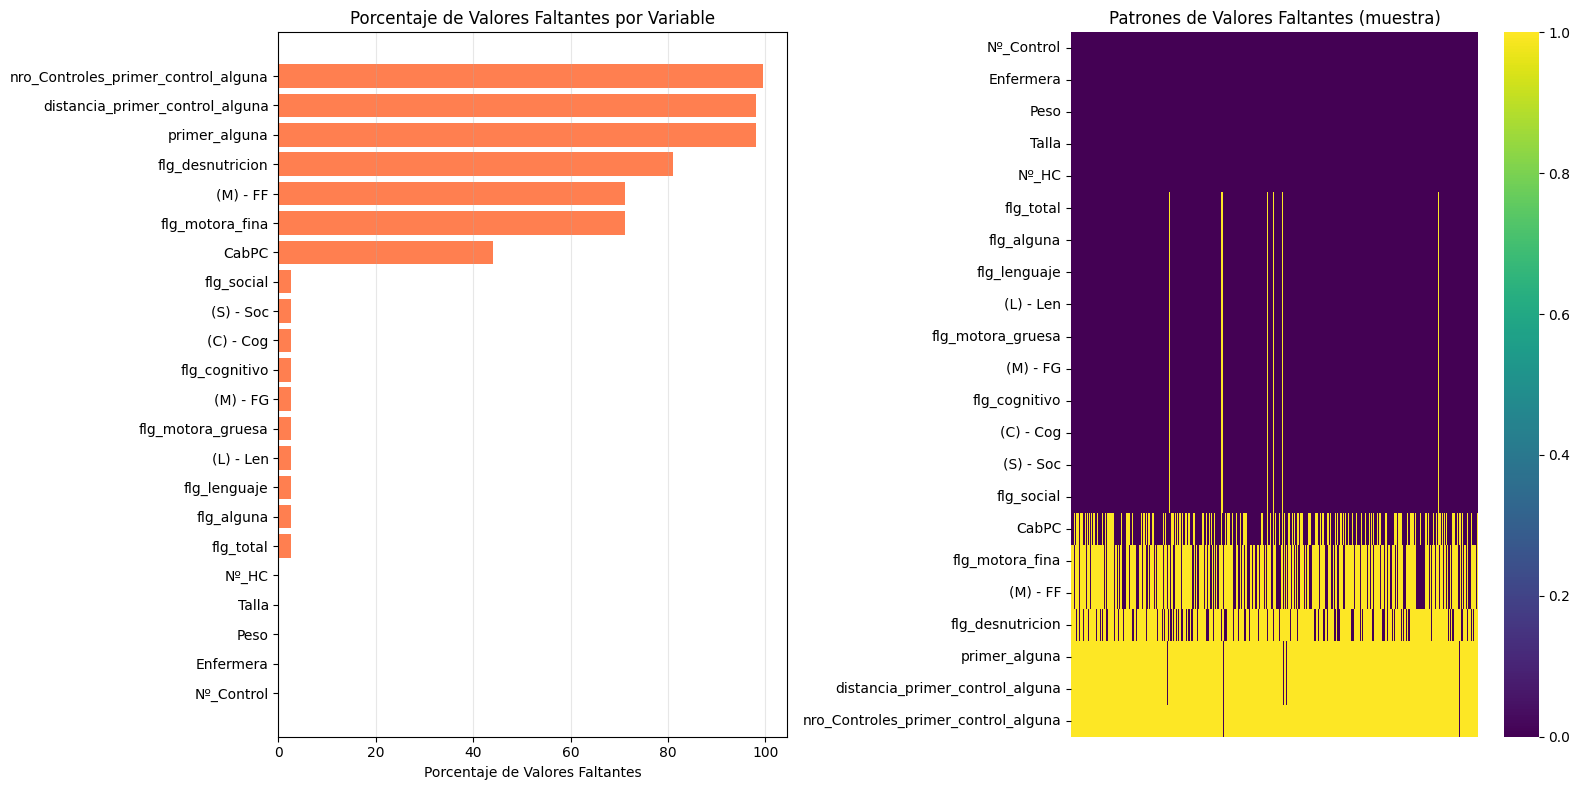

In [39]:
missing_summary = plot_missing_values(df)

In [13]:
missing_summary.sort_values('Missing_Pct', ascending=False)

,Variable,Missing_Count,Missing_Pct
32,nro_Controles_primer_control_alguna,268210,99.583784
31,distancia_primer_control_alguna,264331,98.143548
30,primer_alguna,264331,98.143548
26,flg_desnutricion,218257,81.036717
12,(M) - FF,191970,71.276608
19,flg_motora_fina,191970,71.276608
9,CabPC,118478,43.989738
22,flg_social,6915,2.567473
15,(S) - Soc,6915,2.567473
13,(C) - Cog,6902,2.562646


In [83]:
def plot_categorical_analysis(df, categorical_vars):
    # 1. PRIMER GRÁFICO: Distribución de variables categóricas clave
    key_cats = ['Sexo', 'Tipo_Paciente', '(M) - FG', '(C) - Cog', '(L) - Len', '(S) - Soc']
    available_cats = [var for var in key_cats if var in df.columns]
    
    if available_cats:
        fig, axes = plt.subplots(2, 3, figsize=(20, 12))
        axes = axes.flatten()
        
        for i, var in enumerate(available_cats):
            if i < len(axes):
                value_counts = df[var].value_counts().head(10)
                
                bars = axes[i].barh(range(len(value_counts)), value_counts.values, 
                                   color=plt.cm.Set3(np.linspace(0, 1, len(value_counts))))
                
                axes[i].set_yticks(range(len(value_counts)))
                axes[i].set_yticklabels(value_counts.index)
                axes[i].set_xlabel('Frecuencia')
                axes[i].set_title(f'{var}')
                
                for j, (bar, value) in enumerate(zip(bars, value_counts.values)):
                    axes[i].text(bar.get_width() + max(value_counts)*0.01, 
                               bar.get_y() + bar.get_height()/2, 
                               f'{value}\n({value/len(df)*100:.1f}%)', 
                               ha='left', va='center', fontsize=9)
                
                axes[i].grid(axis='x', alpha=0.3)
        
        # Ocultar ejes sobrantes
        for j in range(len(available_cats), len(axes)):
            axes[j].set_visible(False)
        
        plt.suptitle('Distribución de Variables Categóricas Clave', fontsize=16)
        plt.subplots_adjust(left=0.05, bottom=0.1, right=0.95, top=0.9, wspace=0.3, hspace=0.4)
        plt.show()
    
    # 2. SEGUNDO GRÁFICO: Preparar datos de desarrollo
    development_vars = ['(M) - FG', '(M) - FF', '(C) - Cog', '(L) - Len', '(S) - Soc']
    available_dev = [var for var in development_vars if var in df.columns]
    
    if available_dev:
        print("Preparando análisis de desarrollo...")
        
        dev_data = []
        for var in available_dev:
            counts = df[var].value_counts()
            normal_indicators = ['SI', '', 'Normal', 'Adecuado']
            alterado_indicators = ['NO', 'Alterado', 'Inadecuado', 'Déficit']
            
            normal = sum(counts.get(indicator, 0) for indicator in normal_indicators)
            alterado = sum(counts.get(indicator, 0) for indicator in alterado_indicators)
            missing = df[var].isnull().sum()
            
            dev_data.append({
                'Area': var.replace('(', '').replace(')', '').replace(' - ', ''),
                'Normal': normal,
                'Alterado': alterado,
                'Missing': missing
            })
        
        dev_df = pd.DataFrame(dev_data)
        print("Datos preparados. Creando gráficos...")
        
    # 3. TERCER GRÁFICO: Barras agrupadas
    if available_dev:
        plt.clf()
        plt.close('all')
        
        fig = plt.figure(figsize=(12, 6))
        
        x = np.arange(len(dev_df))
        width = 0.25
        
        bar1 = plt.bar(x - width, dev_df['Normal'], width, label='Normal', color='lightgreen', alpha=0.8)
        bar2 = plt.bar(x, dev_df['Alterado'], width, label='Alterado', color='lightcoral', alpha=0.8)
        bar3 = plt.bar(x + width, dev_df['Missing'], width, label='Sin Datos', color='lightgray', alpha=0.8)
        
        plt.xlabel('Área de Desarrollo')
        plt.ylabel('Número de Casos')
        plt.title('Desarrollo por Área: Comparación de Estados', fontsize=14, fontweight='bold')
        plt.xticks(x, dev_df['Area'], rotation=45, ha='right')
        plt.legend()
        plt.grid(axis='y', alpha=0.3)
        
        plt.subplots_adjust(bottom=0.2)
        plt.show()

    

            

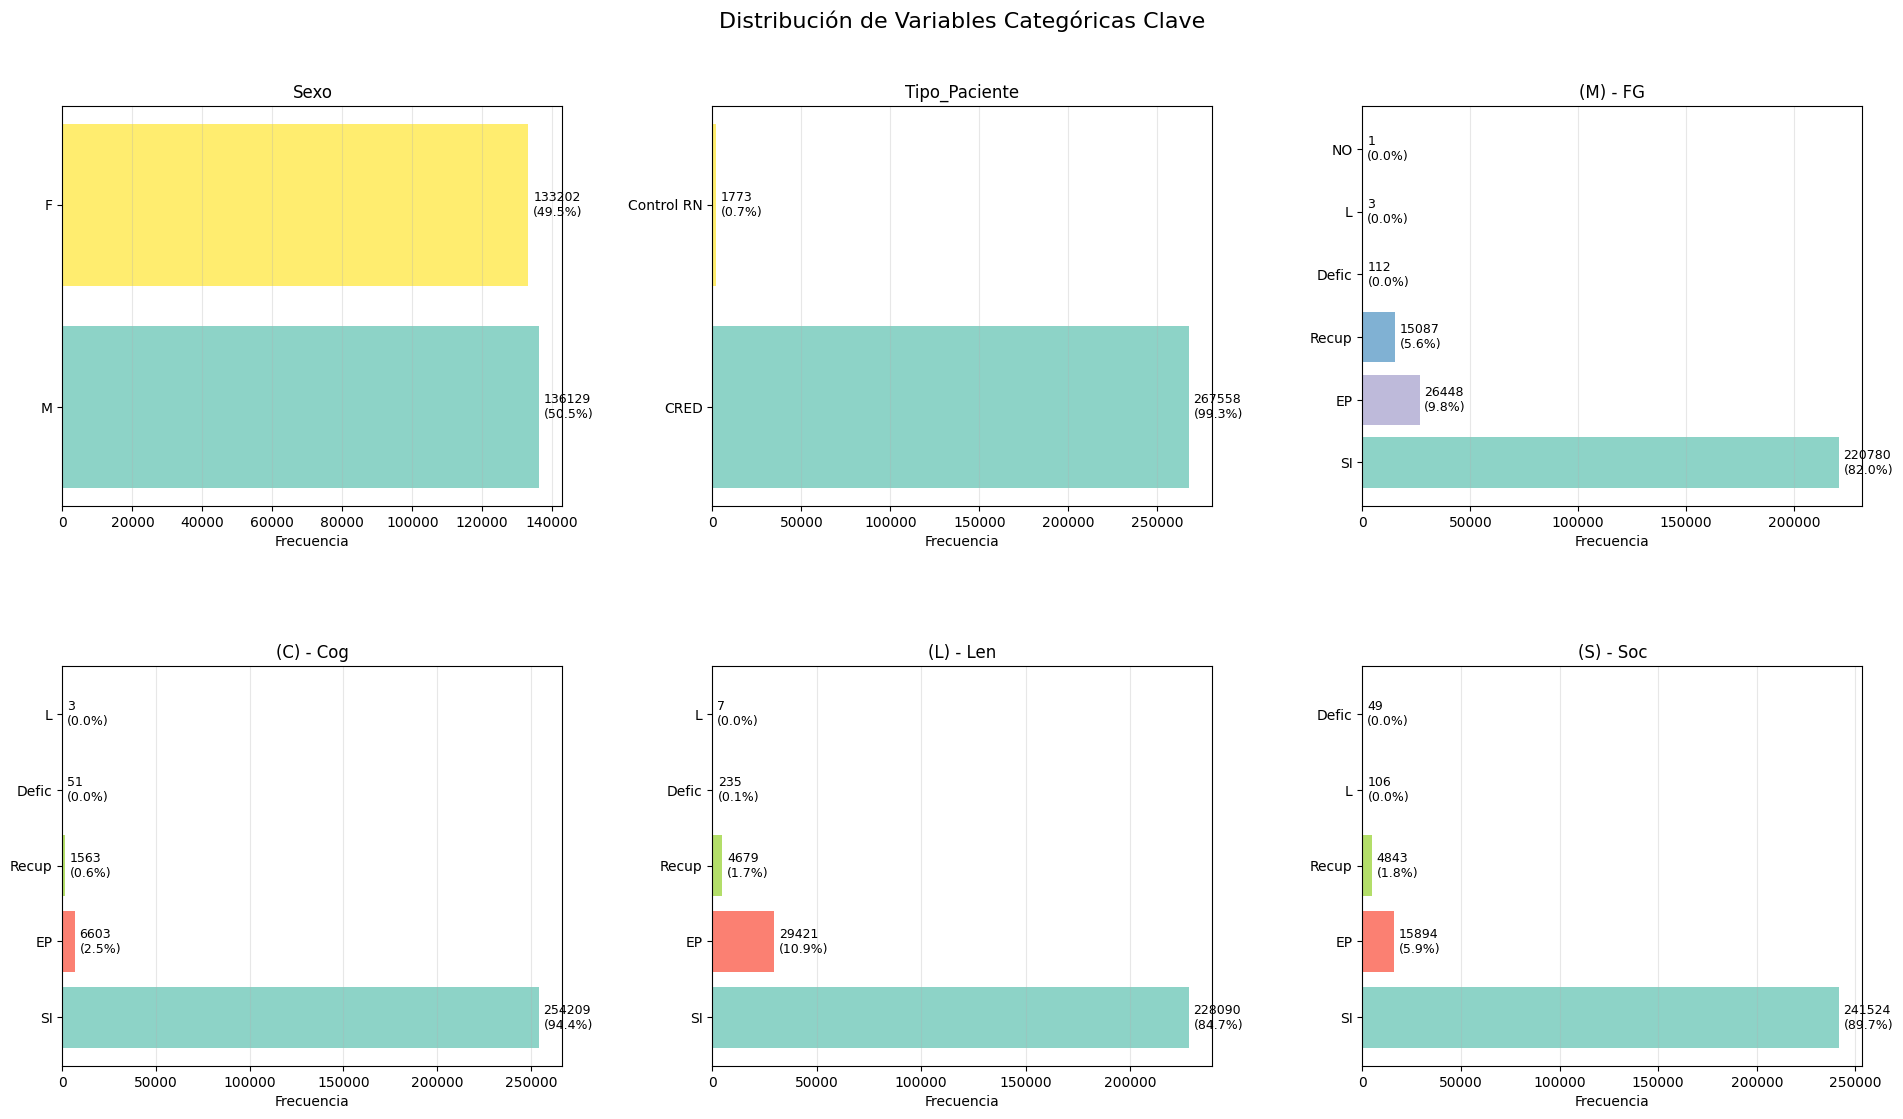

Preparando análisis de desarrollo...
Datos preparados. Creando gráficos...


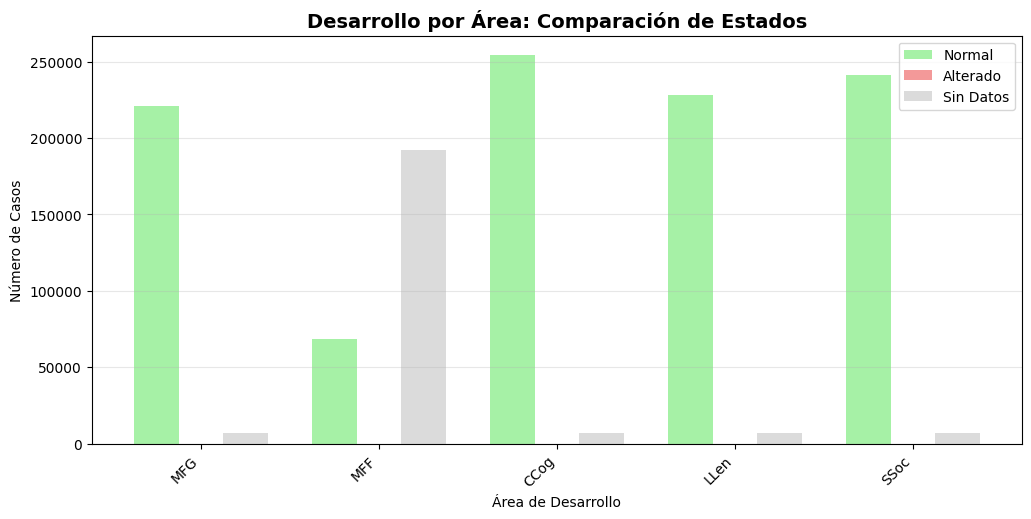

In [84]:
plot_categorical_analysis(df, categorical_vars)

In [43]:
def plot_numeric_analysis(df, numeric_vars):
    available_nums = [var for var in numeric_vars if var in df.columns and df[var].notna().sum() > 0]
    
    if not available_nums:
        print("No hay variables numéricas válidas para analizar")
        return
    
    # 1. Distribuciones con estadísticas
    n_cols = 3
    n_rows = (len(available_nums) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6*n_rows))
    
    if n_rows == 1:
        axes = [axes] if n_cols == 1 else axes
    else:
        axes = axes.flatten()
    
    for i, var in enumerate(available_nums):
        if i < len(axes):
            data = df[var].dropna()
            
            if len(data) > 0:
                # Histograma
                axes[i].hist(data, bins=50, alpha=0.7, density=True, color='skyblue', edgecolor='black')
                
                # Curva de densidad (CORREGIDA)
                try:
                    kde = stats.gaussian_kde(data)
                    x_range = np.linspace(data.min(), data.max(), 100)
                    axes[i].plot(x_range, kde(x_range), 'r-', linewidth=2, label='Densidad')
                except:
                    # Si falla la KDE, solo mostrar histograma
                    pass
                
                # Estadísticas en el gráfico
                mean_val = data.mean()
                median_val = data.median()
                axes[i].axvline(mean_val, color='red', linestyle='--', alpha=0.8, label=f'Media: {mean_val:.2f}')
                axes[i].axvline(median_val, color='green', linestyle='--', alpha=0.8, label=f'Mediana: {median_val:.2f}')
                
                axes[i].set_title(f'{var}\n(n={len(data)}, missing={df[var].isnull().sum()})')
                axes[i].set_xlabel(var)
                axes[i].set_ylabel('Densidad')
                axes[i].legend(fontsize=8)
                axes[i].grid(alpha=0.3)
            else:
                axes[i].text(0.5, 0.5, f'{var}\nSin datos válidos', 
                           ha='center', va='center', transform=axes[i].transAxes)
    
    # Ocultar ejes sobrantes
    for j in range(len(available_nums), len(axes)):
        axes[j].set_visible(False)
    
    plt.suptitle('Distribuciones de Variables Numéricas', fontsize=16)
    plt.tight_layout()
    plt.show()
    
    # 2. Box plots y violin plots combinados
    key_numerics = ['EdadMeses', 'Peso', 'Talla', 'CabPC']
    available_key = [var for var in key_numerics if var in df.columns and df[var].notna().sum() > 10]
    
    if available_key:
        fig, axes = plt.subplots(2, len(available_key), figsize=(4*len(available_key), 10))
        
        if len(available_key) == 1:
            axes = axes.reshape(-1, 1)
        
        for i, var in enumerate(available_key):
            data = df[var].dropna()
            
            # Box plot
            bp = axes[0, i].boxplot(data, patch_artist=True)
            bp['boxes'][0].set_facecolor('lightblue')
            bp['boxes'][0].set_alpha(0.7)
            axes[0, i].set_title(f'Outliers en {var}')
            axes[0, i].set_ylabel(var)
            axes[0, i].grid(axis='y', alpha=0.3)
            
            # Agregar estadísticas de outliers
            Q1 = data.quantile(0.25)
            Q3 = data.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = data[(data < lower_bound) | (data > upper_bound)]
            axes[0, i].text(0.02, 0.98, f'Outliers: {len(outliers)} ({len(outliers)/len(data)*100:.1f}%)', 
                           transform=axes[0, i].transAxes, va='top', 
                           bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
            
            # Violin plot
            violin_parts = axes[1, i].violinplot([data], positions=[1], showmeans=True, showmedians=True)
            axes[1, i].set_title(f'Distribución de {var}')
            axes[1, i].set_ylabel(var)
            axes[1, i].set_xticks([1])
            axes[1, i].set_xticklabels([var])
            axes[1, i].grid(axis='y', alpha=0.3)
        
        plt.suptitle('Análisis de Outliers y Distribuciones - Variables Antropométricas', fontsize=14)
        plt.tight_layout()
        plt.show()
        
        # 3. Matriz de correlación de variables numéricas
        corr_vars = [var for var in available_nums if df[var].dtype in ['int64', 'float64']]
        if len(corr_vars) > 1:
            plt.figure(figsize=(10, 8))
            correlation_matrix = df[corr_vars].corr()
            
            mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
            sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', 
                       center=0, square=True, linewidths=0.5)
            plt.title('Matriz de Correlación - Variables Numéricas')
            plt.tight_layout()
            plt.show()


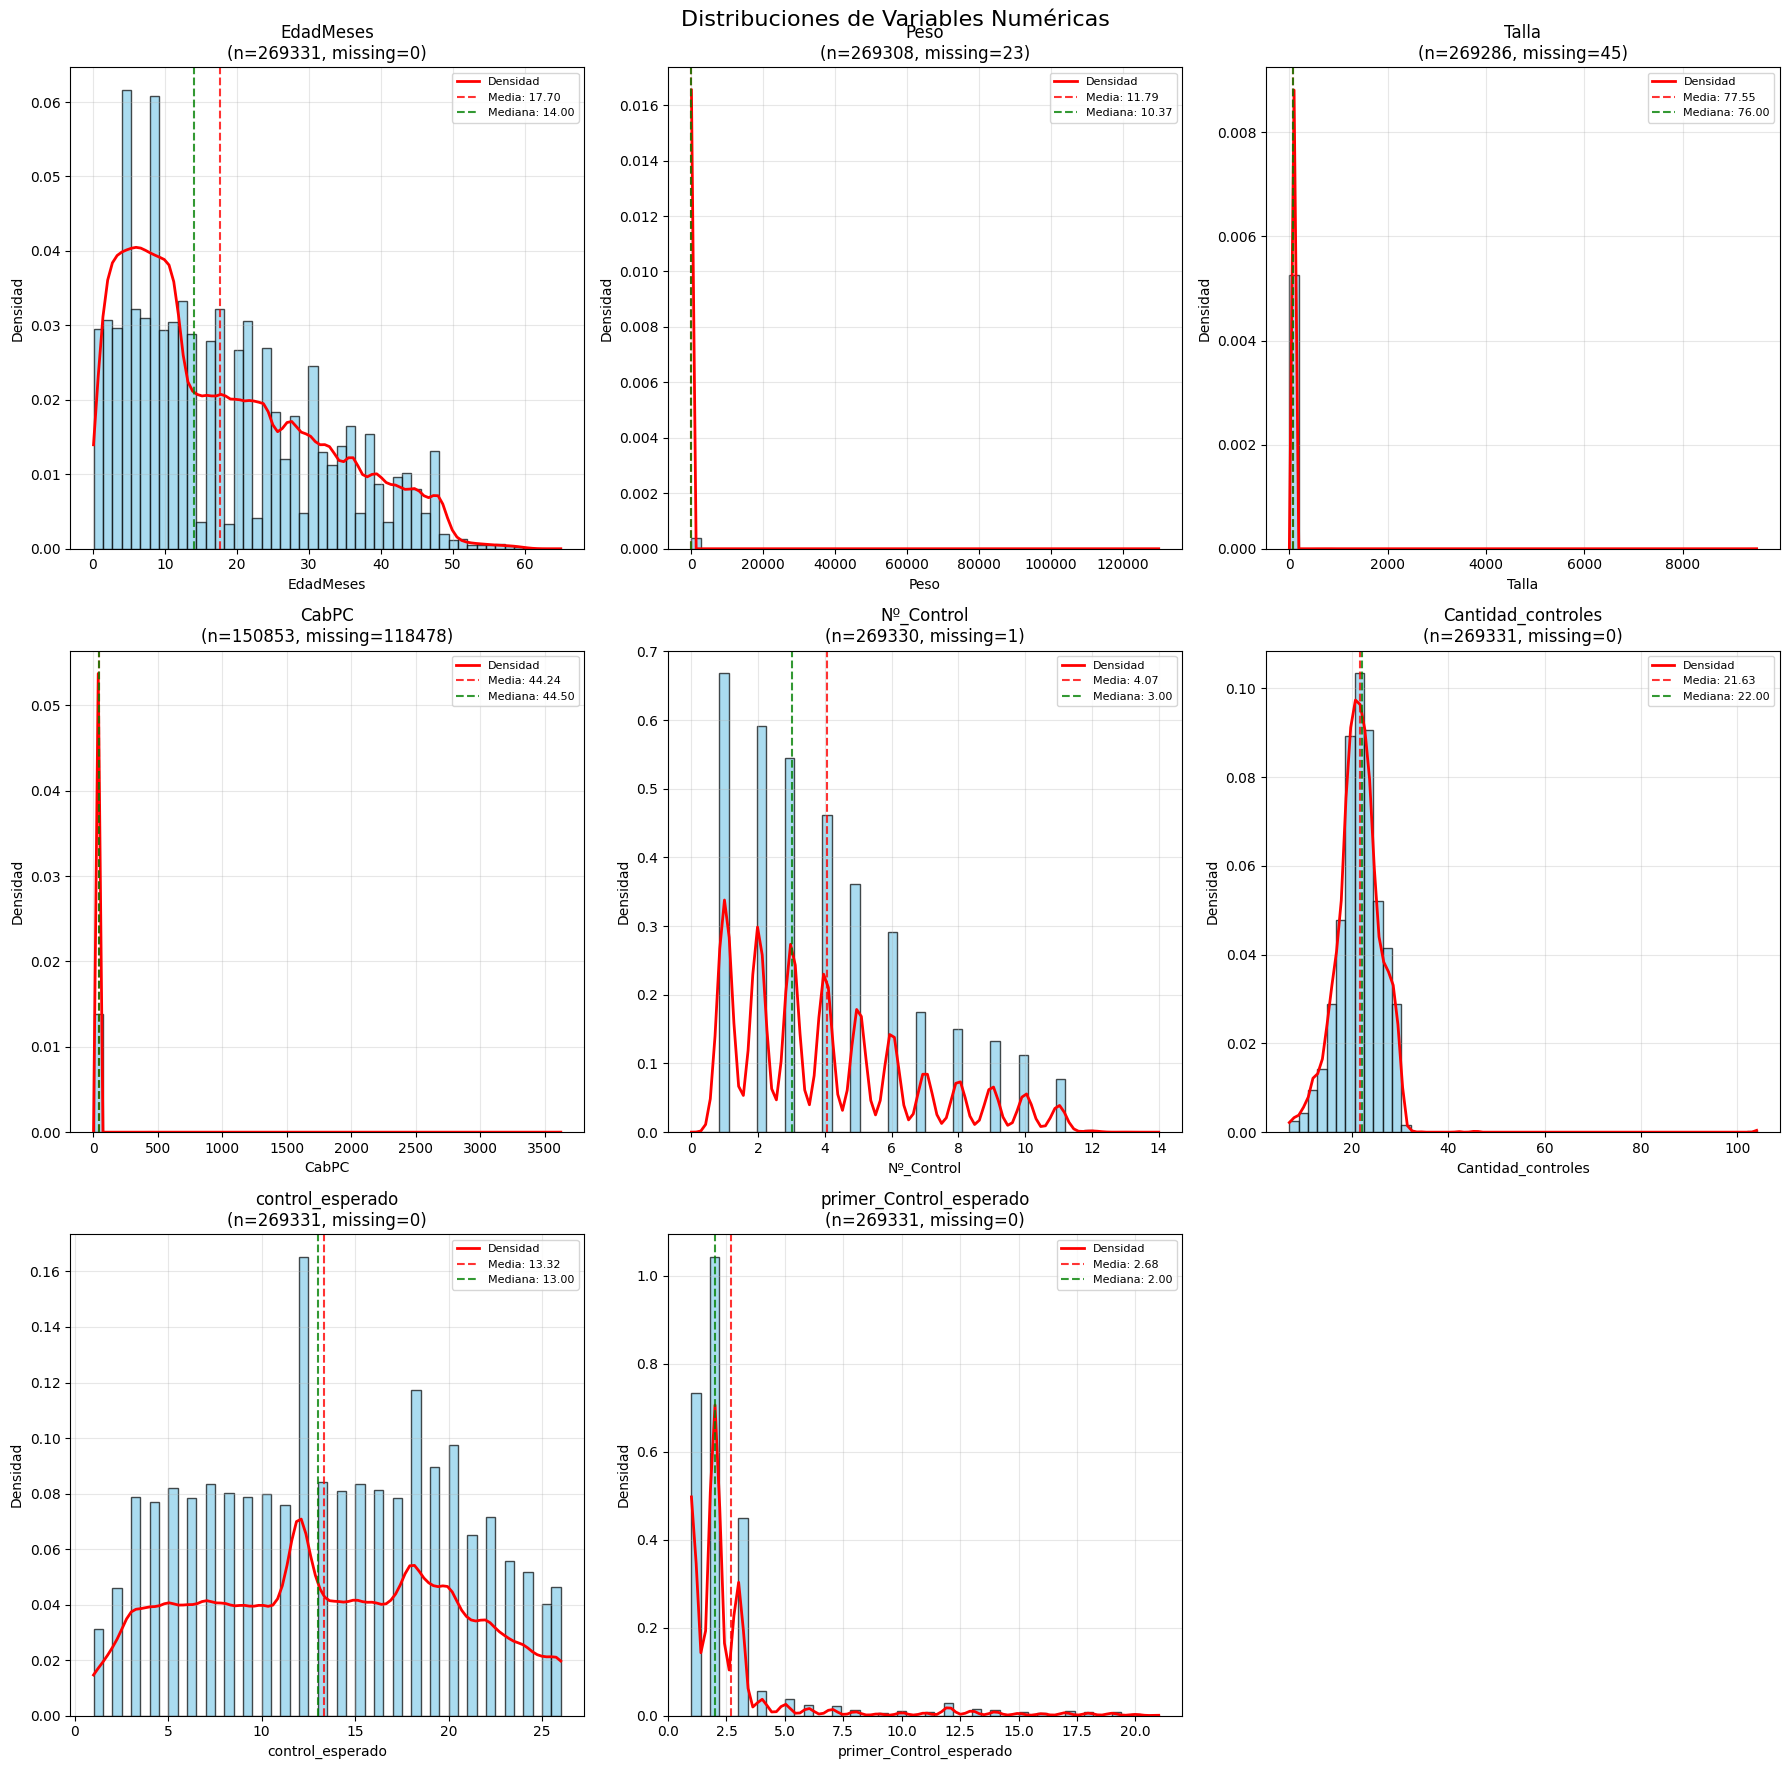

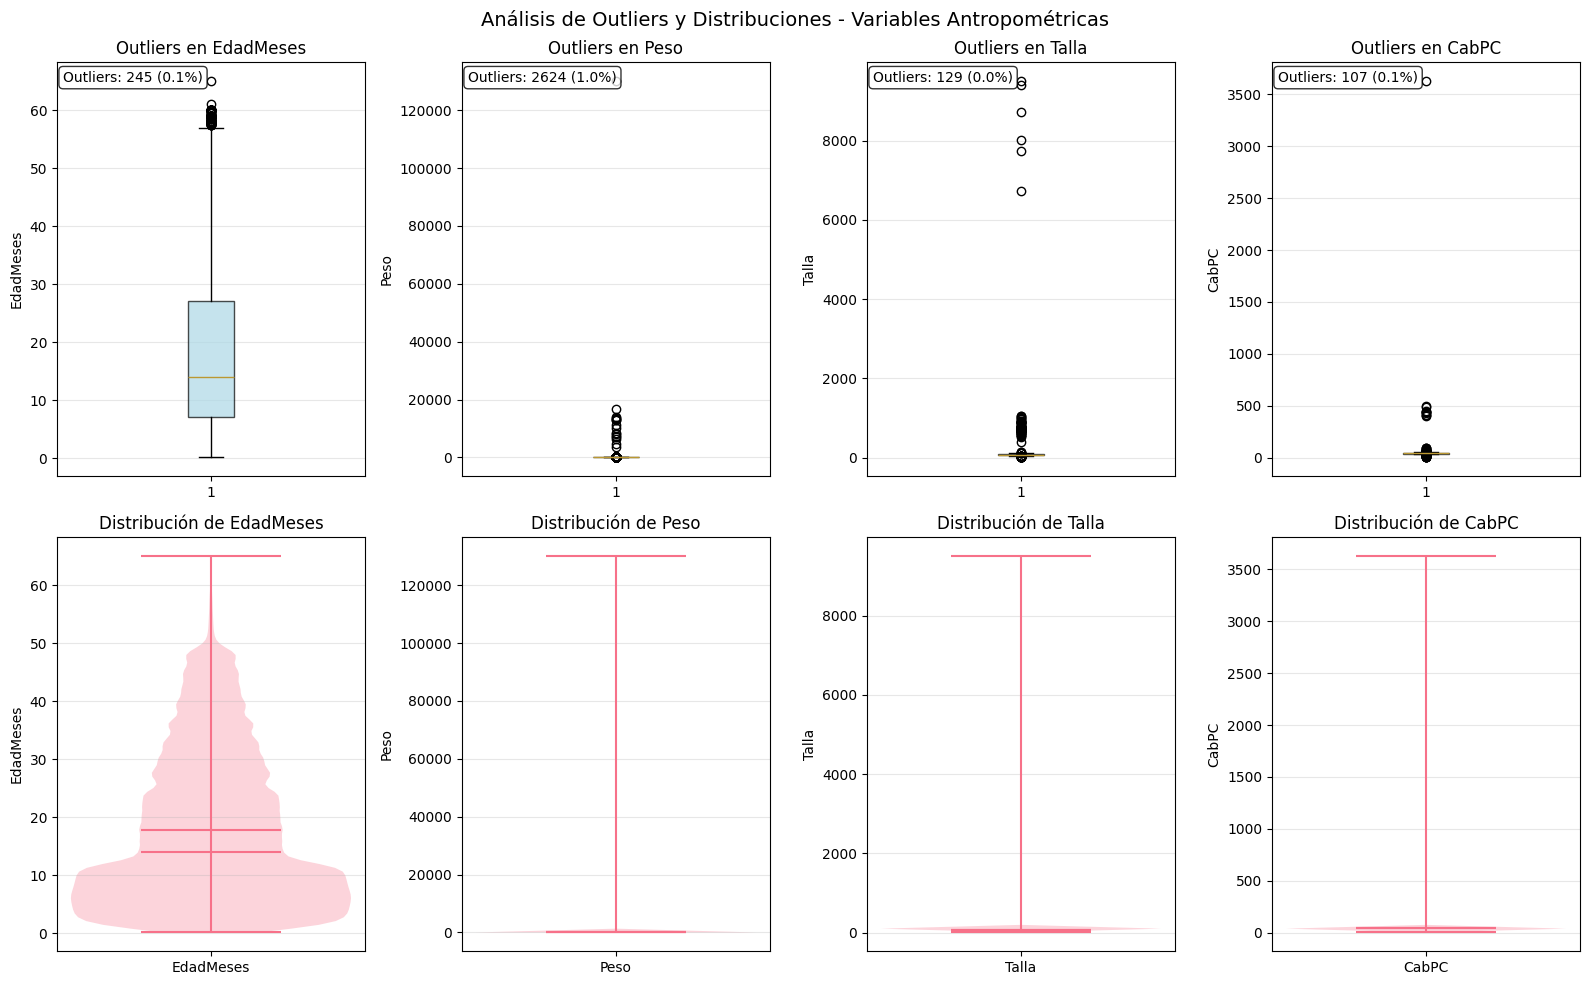

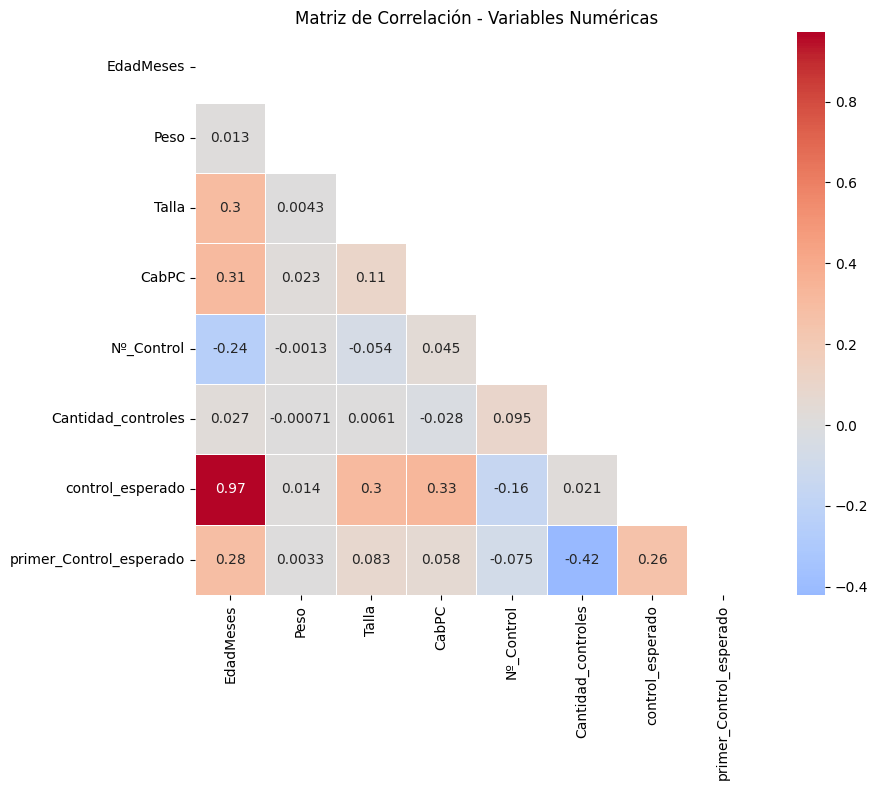

In [44]:
plot_numeric_analysis(df, numeric_vars)

Se observan outliers en las variables de Peso, Talla y PC. Se tratara se identificaran por medio del rango intercuartilico y se imputaran con el percnetil 1 y 99 respectivamente.

In [85]:
def detectar_outliers_iqr(df, col, factor=1.5):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - factor * IQR
    upper = Q3 + factor * IQR
    return df[(df[col] < lower) | (df[col] > upper)]

out_peso_iqr = detectar_outliers_iqr(df, 'Peso').sort_values('Peso', ascending=False)
print("Outliers en Peso (IQR):", len(out_peso_iqr))

out_talla_iqr = detectar_outliers_iqr(df, 'Talla').sort_values('Talla', ascending=False)
print("Outliers en Talla (IQR):", len(out_talla_iqr))

out_talla_iqr = detectar_outliers_iqr(df, 'CabPC').sort_values('CabPC', ascending=False)
print("Outliers en Talla (IQR):", len(out_talla_iqr))

Outliers en Peso (IQR): 2624
Outliers en Talla (IQR): 129
Outliers en Talla (IQR): 107


In [88]:
out_peso_iqr[['Nº_HC','Edad','Talla','Fecha','Peso']].head(20)

,Nº_HC,Edad,Talla,Fecha,Peso
221022,46963.0,1a8m,81.1,2013-10-22,130020.0
59091,73636.0,3a8m,103.1,2021-12-29,16600.0
232360,36063.0,3a6m,93.4,2013-02-06,14100.0
86873,72286.0,2a8m,89.8,2020-09-25,13700.0
88502,71803.0,2a9m,87.5,2020-08-31,13300.0
201013,51502.0,1a10m,86.8,2015-01-02,13090.0
204173,47732.0,2a6m,92.5,2014-10-25,13090.0
46309,81526.0,1a8m,83.1,2022-08-08,11120.0
207399,52726.0,1a2m,75.3,2014-08-20,10250.0
239854,45477.0,10m,71.0,2012-08-09,8590.0


In [90]:
for col in ['Peso','Talla','CabPC']:
    lower = df[col].quantile(0.001)
    upper = df[col].quantile(0.999)
    df[col] = np.clip(df[col], lower, upper)

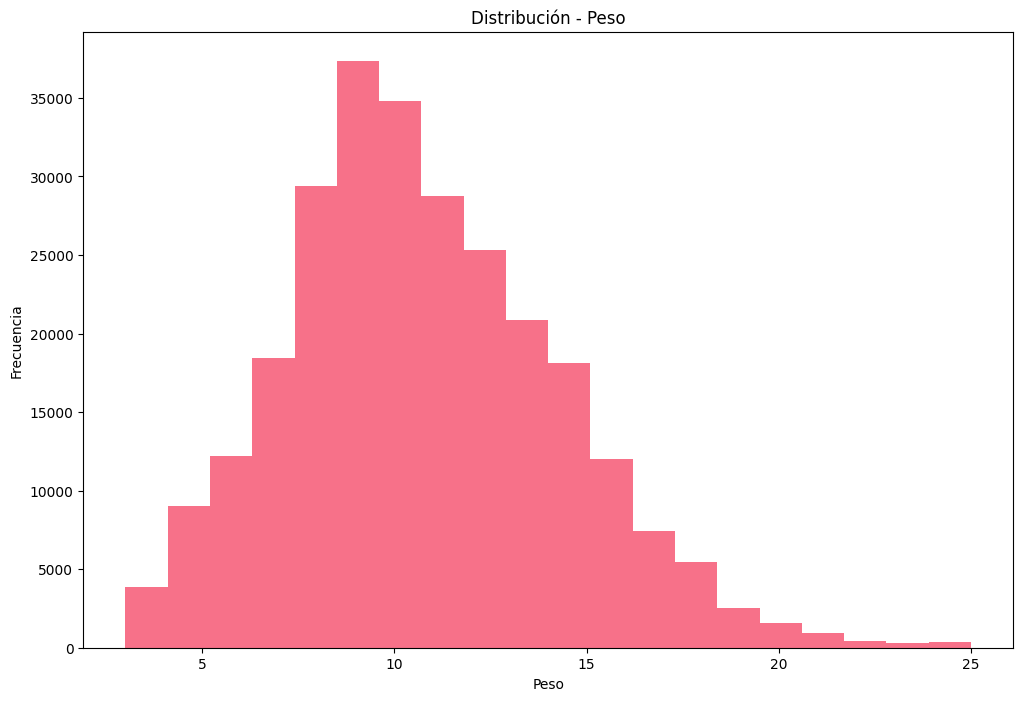

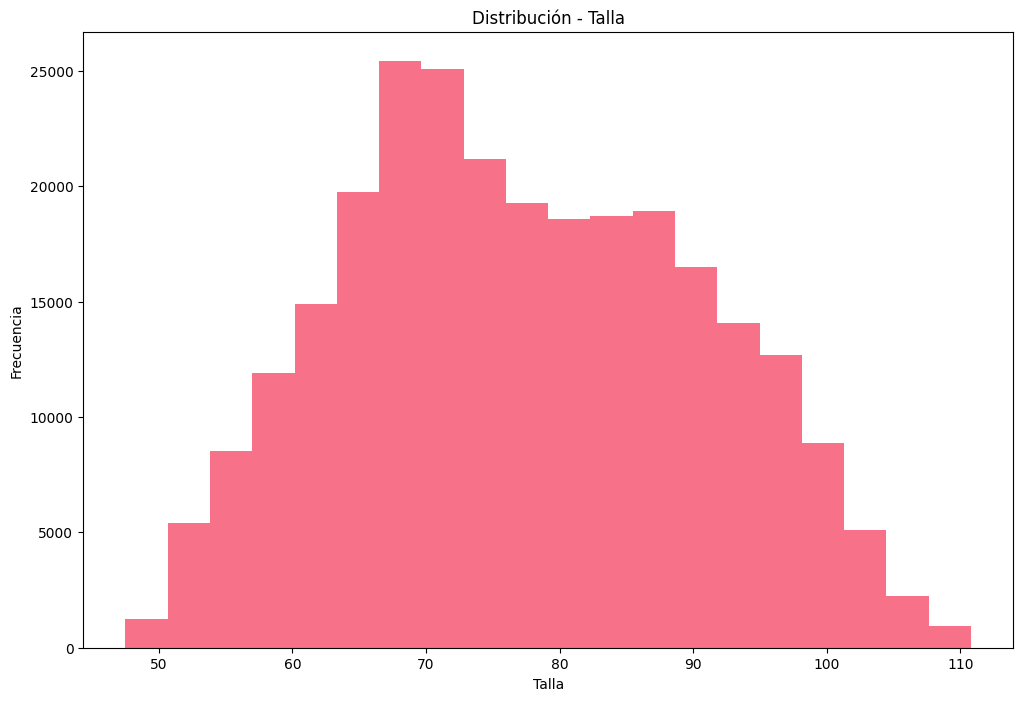

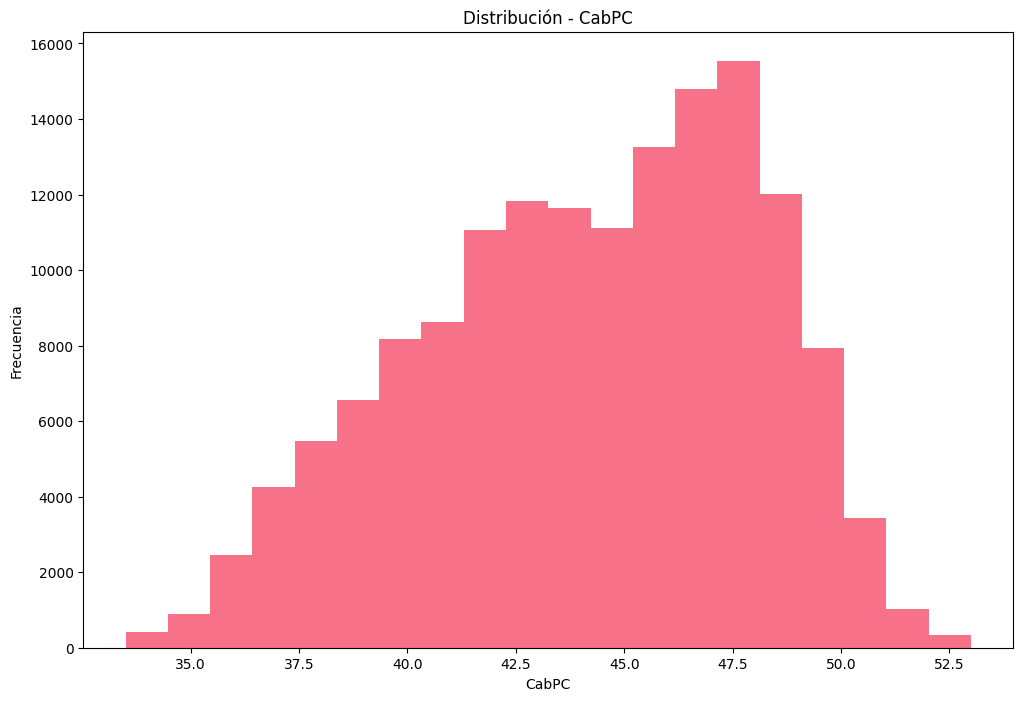

In [92]:
# Histograma peso / talla
for c in ['Peso','Talla','CabPC','Tam_hb','edad_meses','N_Control']:
    if c in df.columns:
        plt.figure()
        df[c].plot(kind='hist', bins=20, title=f"Distribución - {c}")
        plt.xlabel(c)
        plt.ylabel("Frecuencia")
        plt.show()

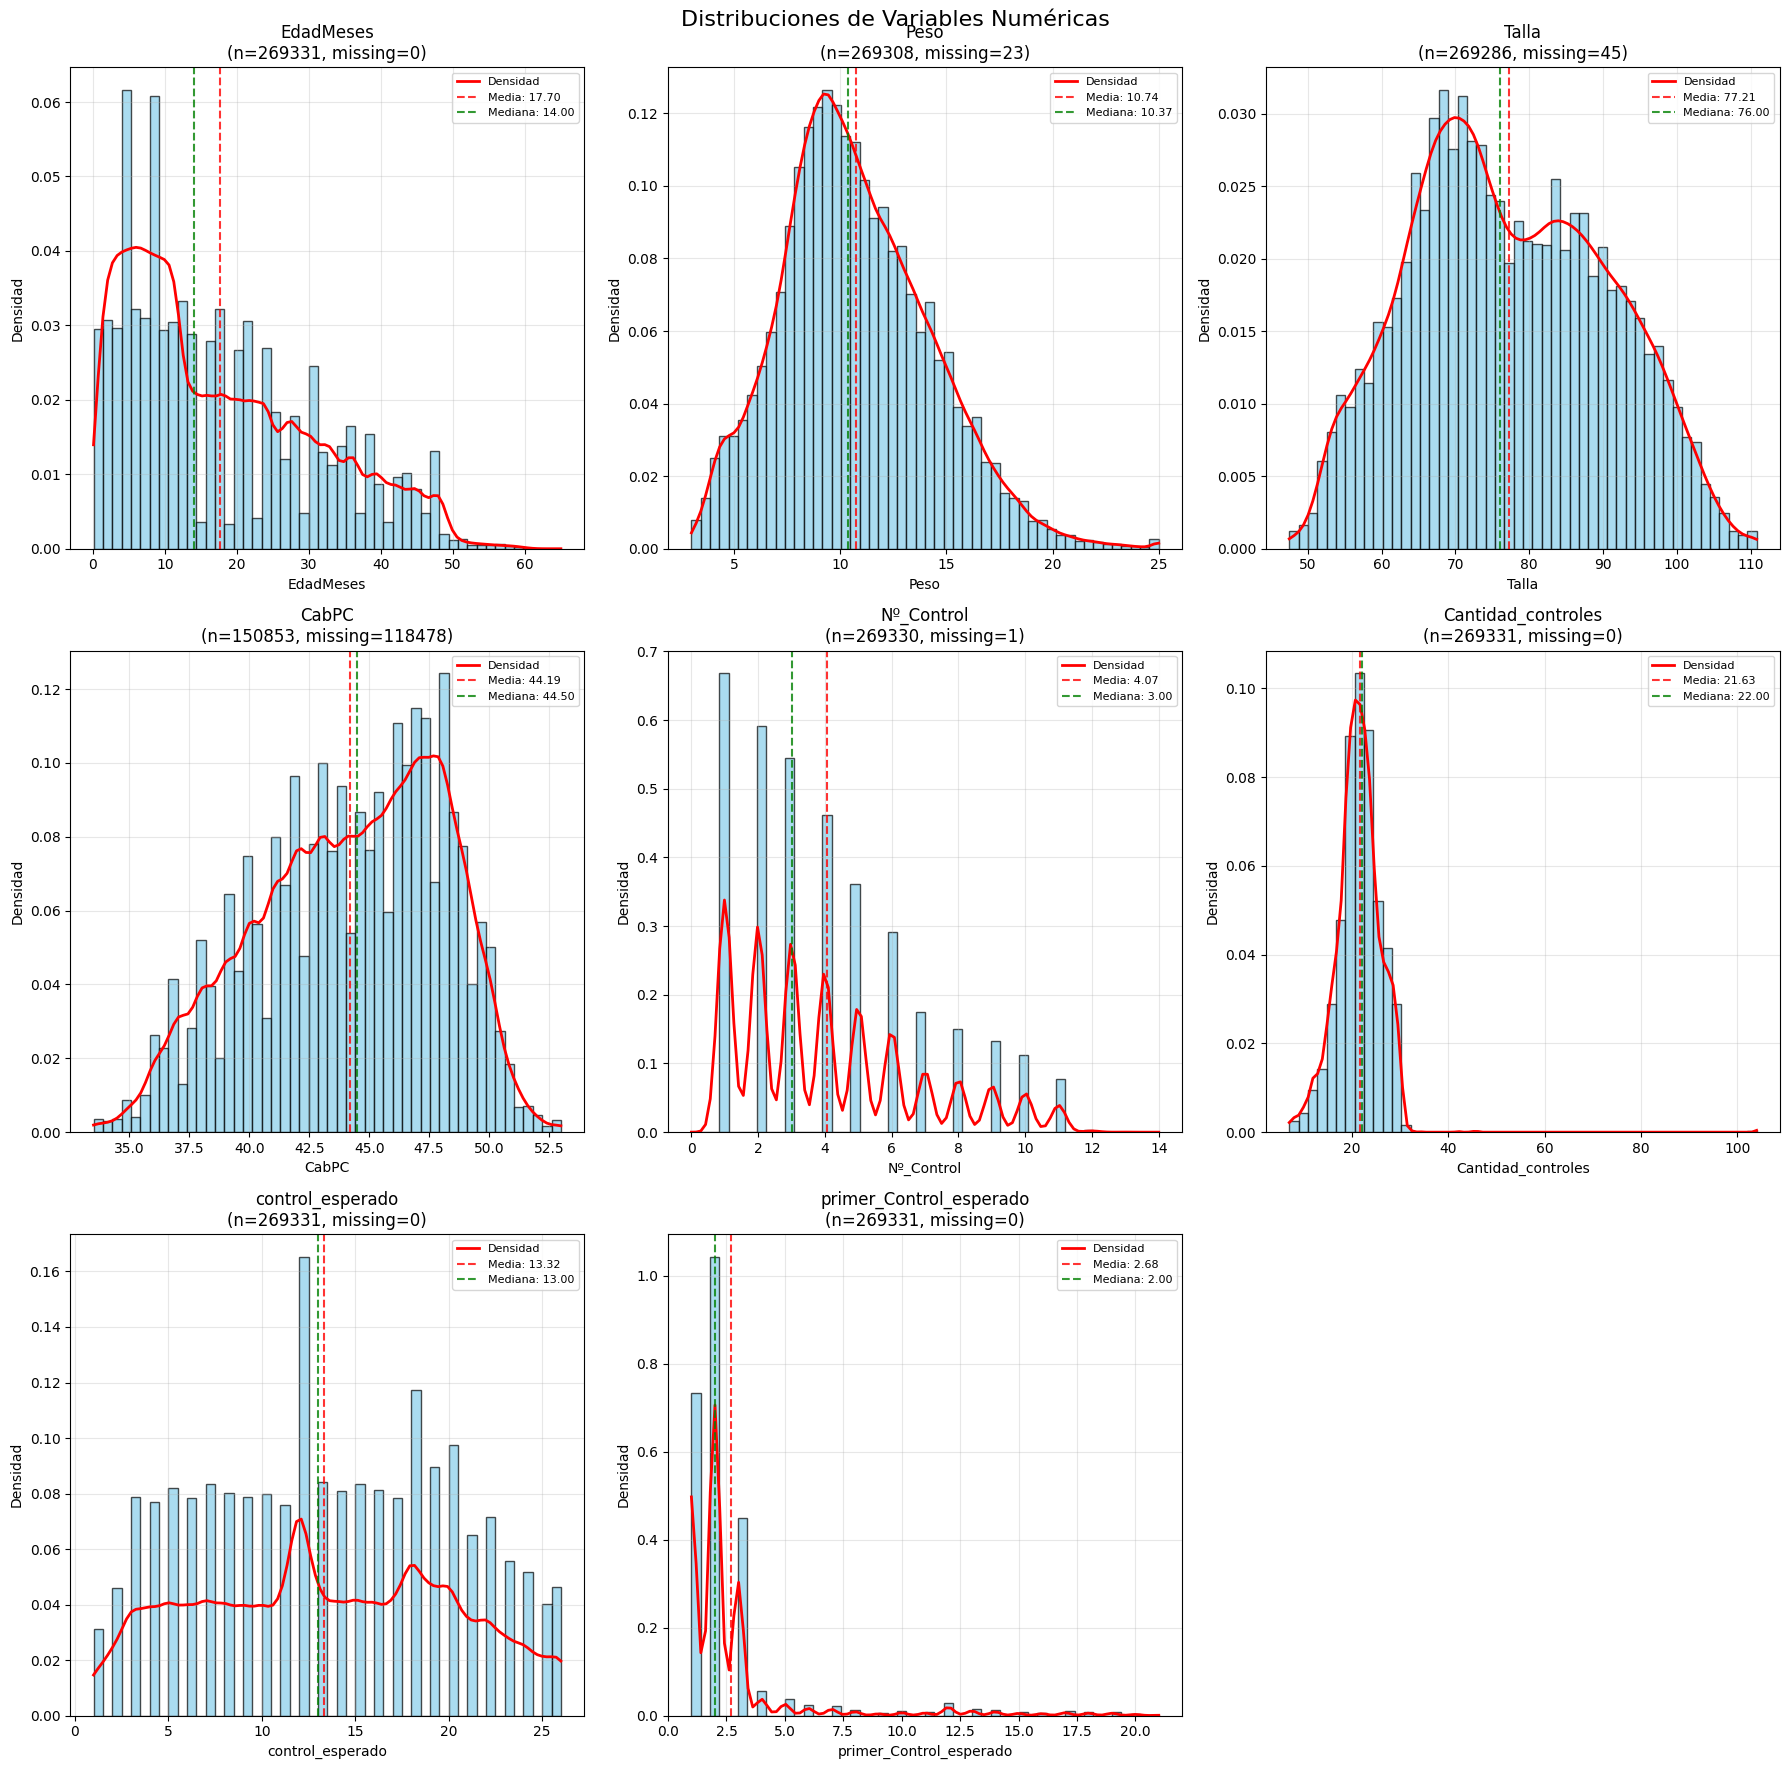

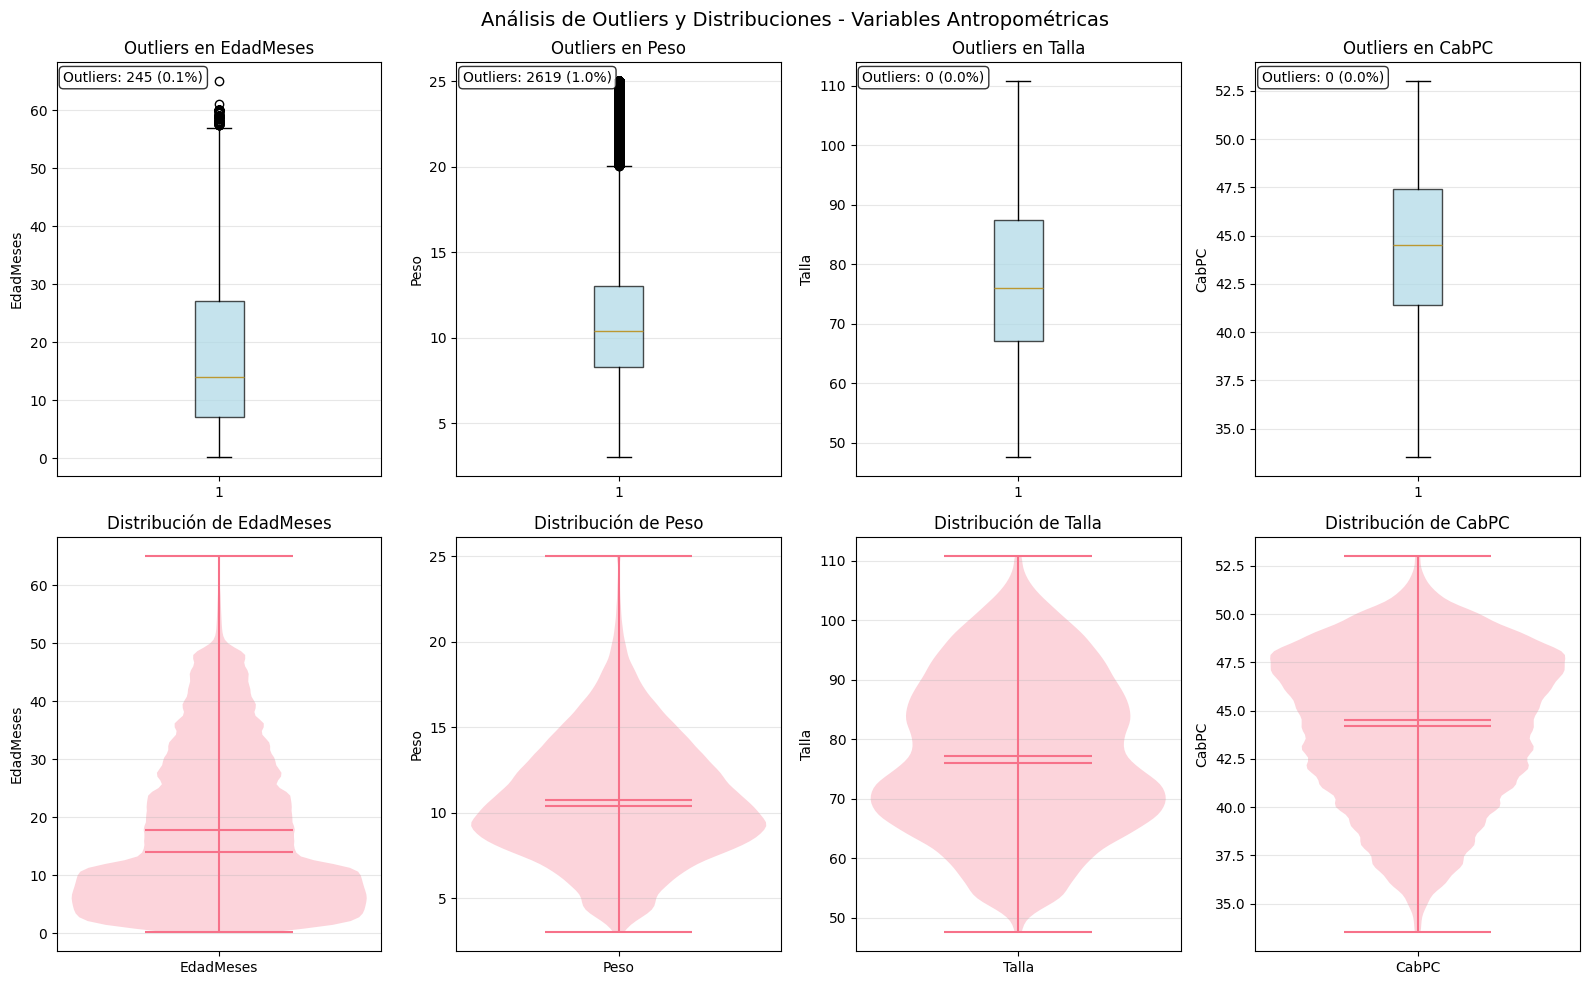

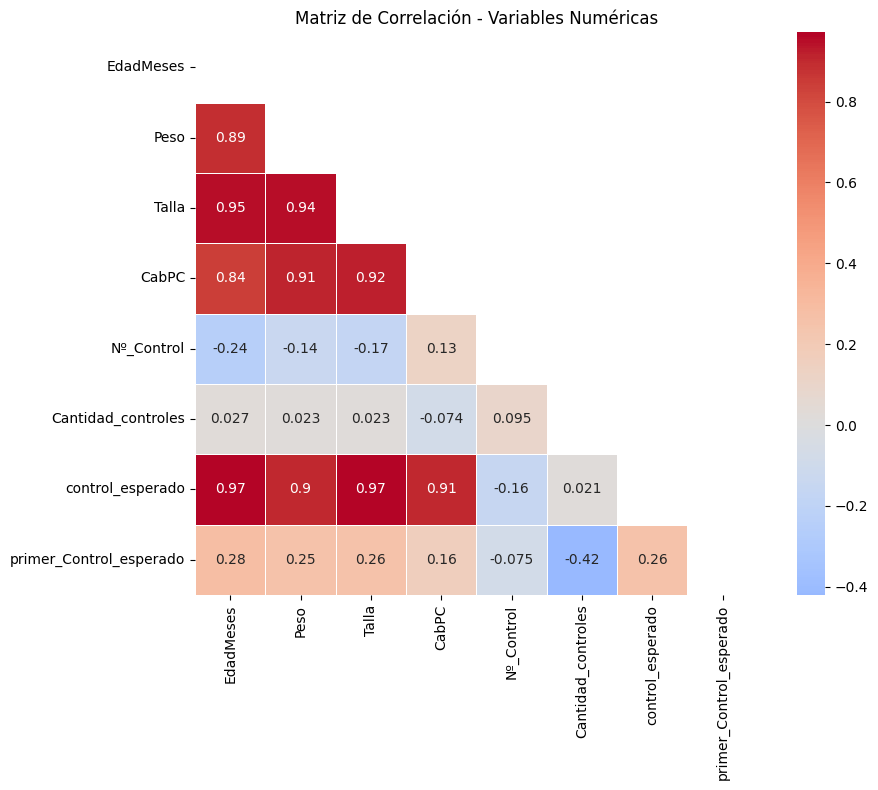

In [96]:
plot_numeric_analysis(df, numeric_vars)

In [53]:
def plot_target_analysis(df):
    # Crear 4 gráficos separados para evitar problemas de layout
    
    # 1. GRÁFICO 1: Distribución del target
    plt.figure(figsize=(10, 6))
    target_counts = df['flg_alguna'].value_counts(dropna=False)
    
    # Preparar datos
    categories = []
    values = []
    colors = []
    
    if 0 in target_counts.index:
        categories.append('Normal (0)')
        values.append(target_counts[0])
        colors.append('lightgreen')
    
    if 1 in target_counts.index:
        categories.append('Déficit (1)')
        values.append(target_counts[1])
        colors.append('lightcoral')
    
    missing = df['flg_alguna'].isnull().sum()
    if missing > 0:
        categories.append('Missing')
        values.append(missing)
        colors.append('lightgray')
    
    bars = plt.bar(categories, values, color=colors, alpha=0.8, edgecolor='black')
    plt.title('Distribución del Target (flg_alguna)', fontsize=14, fontweight='bold')
    plt.ylabel('Número de Casos')
    plt.grid(axis='y', alpha=0.3)
    
    # Agregar valores encima
    total = len(df)
    for bar, value in zip(bars, values):
        pct = value/total*100
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + total*0.01,
                f'{value:,}\n({pct:.1f}%)', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # 2. GRÁFICO 2: Prevalencia por área
    flag_vars = ['flg_motora_gruesa', 'flg_motora_fina', 'flg_cognitivo', 
                'flg_lenguaje', 'flg_social']
    available_flags = [var for var in flag_vars if var in df.columns]
    
    if available_flags:
        plt.figure(figsize=(12, 6))
        
        rates = []
        names = []
        counts = []
        
        for flag in available_flags:
            positive = (df[flag] == 1).sum()
            total_eval = df[flag].notna().sum()
            rate = (positive / total_eval * 100) if total_eval > 0 else 0
            
            rates.append(rate)
            counts.append(positive)
            names.append(flag.replace('flg_', '').replace('_', ' ').title())
        
        bars = plt.bar(names, rates, color='darkorange', alpha=0.7, edgecolor='black')
        plt.title('Prevalencia de Déficits por Área', fontsize=14, fontweight='bold')
        plt.ylabel('Porcentaje de Casos Positivos')
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', alpha=0.3)
        
        # Valores encima
        for bar, rate, count in zip(bars, rates, counts):
            if rate > 0:
                plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(rates)*0.02,
                        f'{rate:.1f}%\n(n={count})', ha='center', va='bottom', fontweight='bold')
        
        plt.tight_layout()
        plt.show()
    
    # 3. GRÁFICO 3: Análisis por área según target
    development_areas = ['(M) - FG', '(M) - FF', '(C) - Cog', '(L) - Len', '(S) - Soc']
    available_areas = [area for area in development_areas if area in df.columns]
    
    if available_areas:
        plt.figure(figsize=(12, 6))
        
        area_data = []
        for area in available_areas:
            area_name = area.replace('(', '').replace(')', '').replace(' - ', '')
            
            # Casos con déficit general
            deficit_cases = df[df['flg_alguna'] == 1]
            normal_cases = df[df['flg_alguna'] == 0]
            
            # Contar alteraciones específicas
            deficit_alt = 0
            normal_alt = 0
            deficit_total = 0
            normal_total = 0
            
            if len(deficit_cases) > 0:
                d_counts = deficit_cases[area].value_counts()
                deficit_alt = d_counts.get('NO', 0) + d_counts.get('Alterado', 0)
                deficit_total = len(deficit_cases) - deficit_cases[area].isnull().sum()
            
            if len(normal_cases) > 0:
                n_counts = normal_cases[area].value_counts()
                normal_alt = n_counts.get('NO', 0) + n_counts.get('Alterado', 0)
                normal_total = len(normal_cases) - normal_cases[area].isnull().sum()
            
            deficit_pct = (deficit_alt / deficit_total * 100) if deficit_total > 0 else 0
            normal_pct = (normal_alt / normal_total * 100) if normal_total > 0 else 0
            
            area_data.append({
                'Area': area_name,
                'Normal': normal_pct,
                'Deficit': deficit_pct
            })
        
        area_df = pd.DataFrame(area_data)
        
        x = np.arange(len(area_df))
        width = 0.35
        
        plt.bar(x - width/2, area_df['Normal'], width, label='Target Normal', 
                color='lightblue', alpha=0.8)
        plt.bar(x + width/2, area_df['Deficit'], width, label='Target Déficit', 
                color='salmon', alpha=0.8)
        
        plt.xlabel('Área de Desarrollo')
        plt.ylabel('% Alteración en el Área')
        plt.title('Alteración por Área según Target Principal', fontsize=14, fontweight='bold')
        plt.xticks(x, area_df['Area'], rotation=45, ha='right')
        plt.legend()
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()
    
    # 4. GRÁFICO 4: Evolución temporal
    if 'Fecha' in df.columns:
        plt.figure(figsize=(12, 6))
        
        df['Periodo'] = df['Fecha'].dt.to_period('M')
        monthly = df.groupby('Periodo').agg({
            'flg_alguna': ['count', 'sum', lambda x: x.isnull().sum()]
        })
        monthly.columns = ['Total', 'Deficits', 'Missing']
        monthly['Valid'] = monthly['Total'] - monthly['Missing']
        monthly['Rate'] = np.where(monthly['Valid'] > 0, 
                                  monthly['Deficits'] / monthly['Valid'] * 100, 0)
        
        # Filtrar periodos con suficientes casos
        monthly = monthly[monthly['Valid'] >= 5]
        
        if len(monthly) > 2:
            periods = [str(p) for p in monthly.index]
            plt.plot(periods, monthly['Rate'], 'ro-', linewidth=2, markersize=6)
            plt.title('Evolución Temporal de la Prevalencia', fontsize=14, fontweight='bold')
            plt.ylabel('% Casos con Déficit')
            plt.xlabel('Período (Año-Mes)')
            plt.xticks(rotation=45, ha='right')
            plt.grid(True, alpha=0.3)
            
            # Mostrar solo algunas etiquetas si hay muchas
            if len(periods) > 12:
                step = len(periods) // 10
                plt.xticks(range(0, len(periods), step), 
                          [periods[i] for i in range(0, len(periods), step)], 
                          rotation=45, ha='right')
        else:
            plt.text(0.5, 0.5, 'Datos insuficientes para análisis temporal', 
                    ha='center', va='center', transform=plt.gca().transAxes,
                    fontsize=14, bbox=dict(boxstyle='round', facecolor='lightyellow'))
            plt.title('Evolución Temporal')
        
        plt.tight_layout()
        plt.show()
    
    # Resumen estadístico
    print("="*50)
    print("RESUMEN DEL ANÁLISIS DEL TARGET")
    print("="*50)
    
    total = len(df)
    deficit_count = (df['flg_alguna'] == 1).sum()
    normal_count = (df['flg_alguna'] == 0).sum()
    missing_count = df['flg_alguna'].isnull().sum()
    
    print(f"Total de registros: {total:,}")
    print(f"Casos con déficit (1): {deficit_count:,} ({deficit_count/total*100:.2f}%)")
    print(f"Casos normales (0): {normal_count:,} ({normal_count/total*100:.2f}%)")
    print(f"Casos sin evaluar: {missing_count:,} ({missing_count/total*100:.2f}%)")
    print("-"*50)


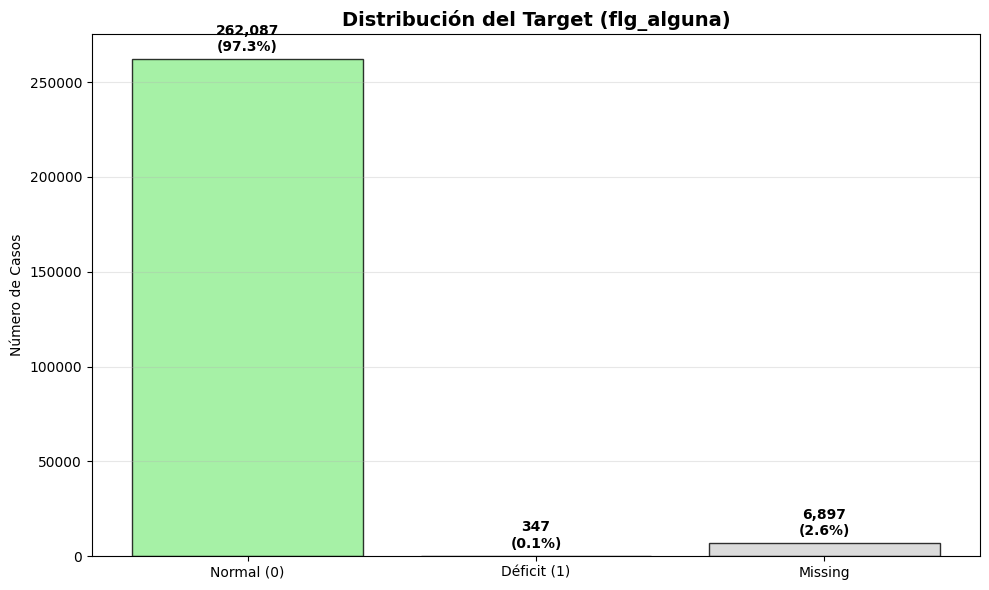

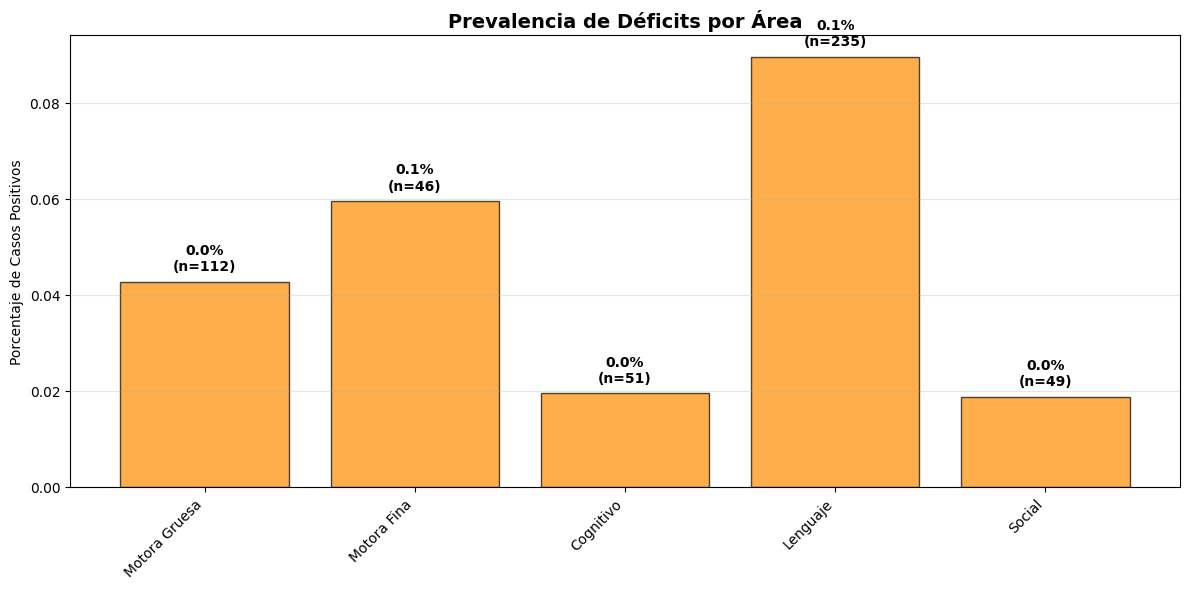

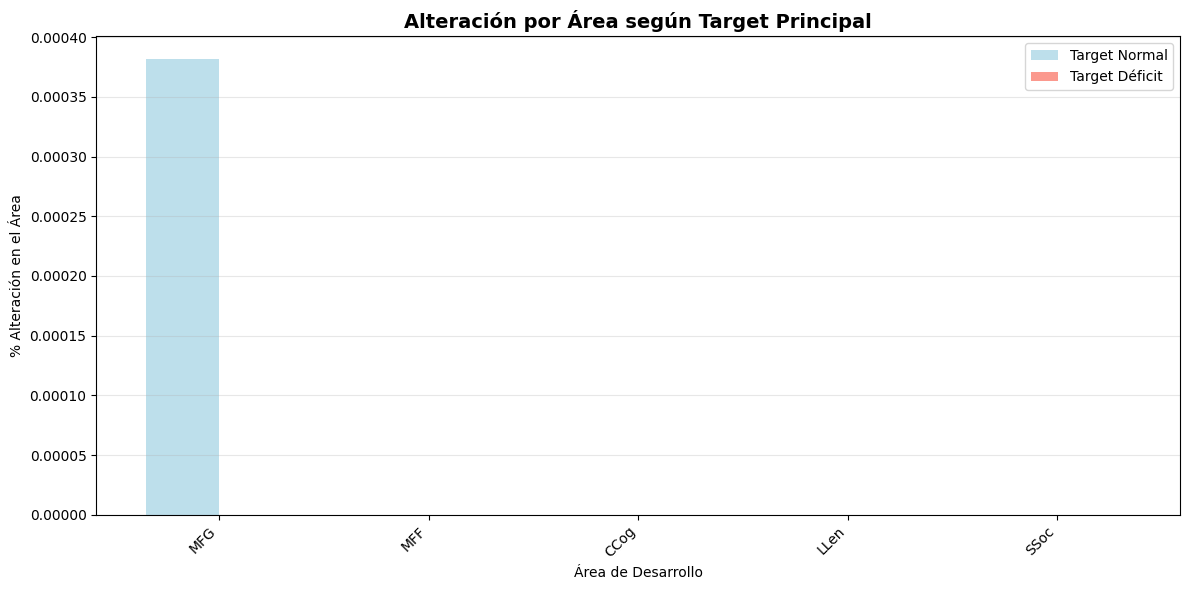

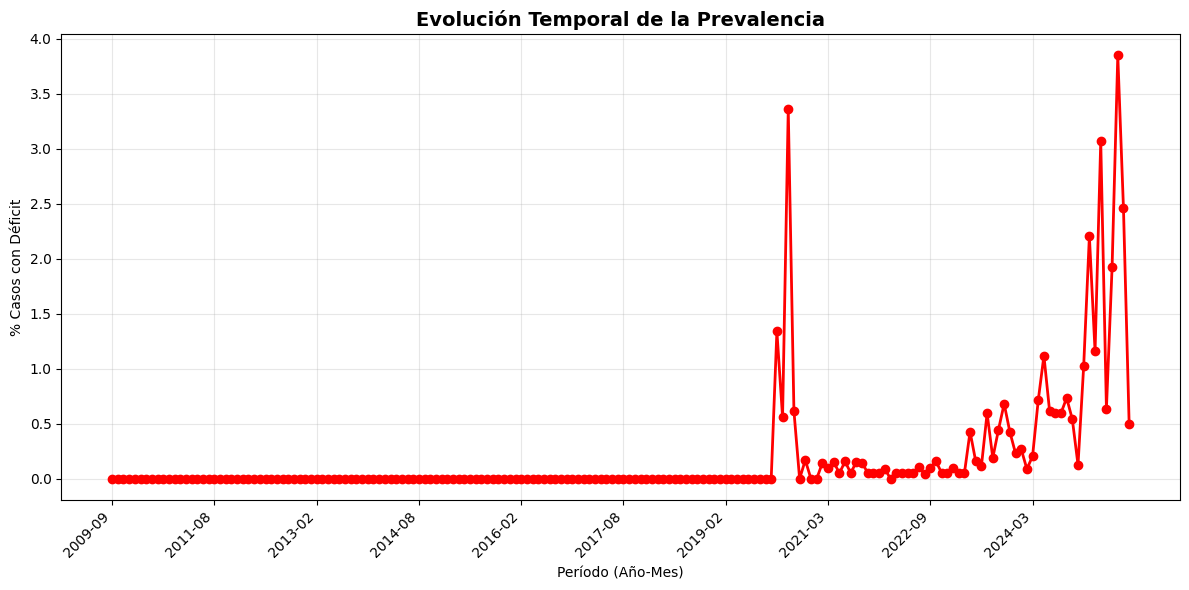

RESUMEN DEL ANÁLISIS DEL TARGET
Total de registros: 269,331
Casos con déficit (1): 347 (0.13%)
Casos normales (0): 262,087 (97.31%)
Casos sin evaluar: 6,897 (2.56%)
--------------------------------------------------


In [54]:
plot_target_analysis(df)

## Analisis bivariado

In [56]:
def correlation_analysis(df):
    # Seleccionar solo variables numéricas para correlación
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    # Excluir variables de identificación que no son relevantes
    exclude_cols = ['Nº_HC', 'key', 'Fecha']  # IDs y fechas
    numeric_cols = [col for col in numeric_cols if col not in exclude_cols]
    
    print("Variables numéricas para análisis de correlación:")
    print(numeric_cols)
    
    # Matriz de correlación
    plt.figure(figsize=(14, 10))
    
    corr_matrix = df[numeric_cols].corr()
    
    # Crear máscara para triángulo superior
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    # Heatmap
    sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', 
                cmap='coolwarm', center=0, square=True, 
                linewidths=0.5, cbar_kws={"shrink": .8})
    
    plt.title('Matriz de Correlación - Variables Numéricas', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Correlaciones más fuertes con el target
    if 'flg_alguna' in df.columns:
        target_corrs = corr_matrix['flg_alguna'].abs().sort_values(ascending=False)
        target_corrs = target_corrs[target_corrs.index != 'flg_alguna']  # Excluir autocorrelación
        
        print("\n" + "="*50)
        print("CORRELACIONES MÁS FUERTES CON EL TARGET (flg_alguna)")
        print("="*50)
        
        for var, corr in target_corrs.head(10).items():
            direction = "positiva" if corr_matrix.loc['flg_alguna', var] > 0 else "negativa"
            print(f"{var}: {corr:.3f} ({direction})")
        
        # Gráfico de correlaciones con target
        plt.figure(figsize=(12, 6))
        top_corrs = target_corrs.head(8)
        colors = ['red' if corr_matrix.loc['flg_alguna', var] > 0 else 'blue' for var in top_corrs.index]
        
        bars = plt.bar(range(len(top_corrs)), top_corrs.values, color=colors, alpha=0.7)
        plt.title('Top Correlaciones con el Target (flg_alguna)', fontsize=14, fontweight='bold')
        plt.ylabel('Correlación Absoluta')
        plt.xlabel('Variables')
        plt.xticks(range(len(top_corrs)), top_corrs.index, rotation=45, ha='right')
        plt.grid(axis='y', alpha=0.3)
        
        # Agregar valores encima de las barras
        for bar, corr, var in zip(bars, top_corrs.values, top_corrs.index):
            actual_corr = corr_matrix.loc['flg_alguna', var]
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
                    f'{actual_corr:.3f}', ha='center', va='bottom', fontweight='bold')
        
        plt.tight_layout()
        plt.show()

Variables numéricas para análisis de correlación:
['Nº_Control', 'Peso', 'Talla', 'CabPC', 'flg_motora_gruesa', 'flg_motora_fina', 'flg_cognitivo', 'flg_lenguaje', 'flg_social', 'flg_total', 'flg_alguna', 'flg_desnutricion', 'Nro_Control_recreado', 'primer_Control_esperado', 'ultimo_Control', 'primer_alguna', 'distancia_primer_control_alguna', 'nro_Controles_primer_control_alguna', 'control_esperado', 'EdadMeses', 'Cantidad_controles', 'cant_controles_primer_Alguna']


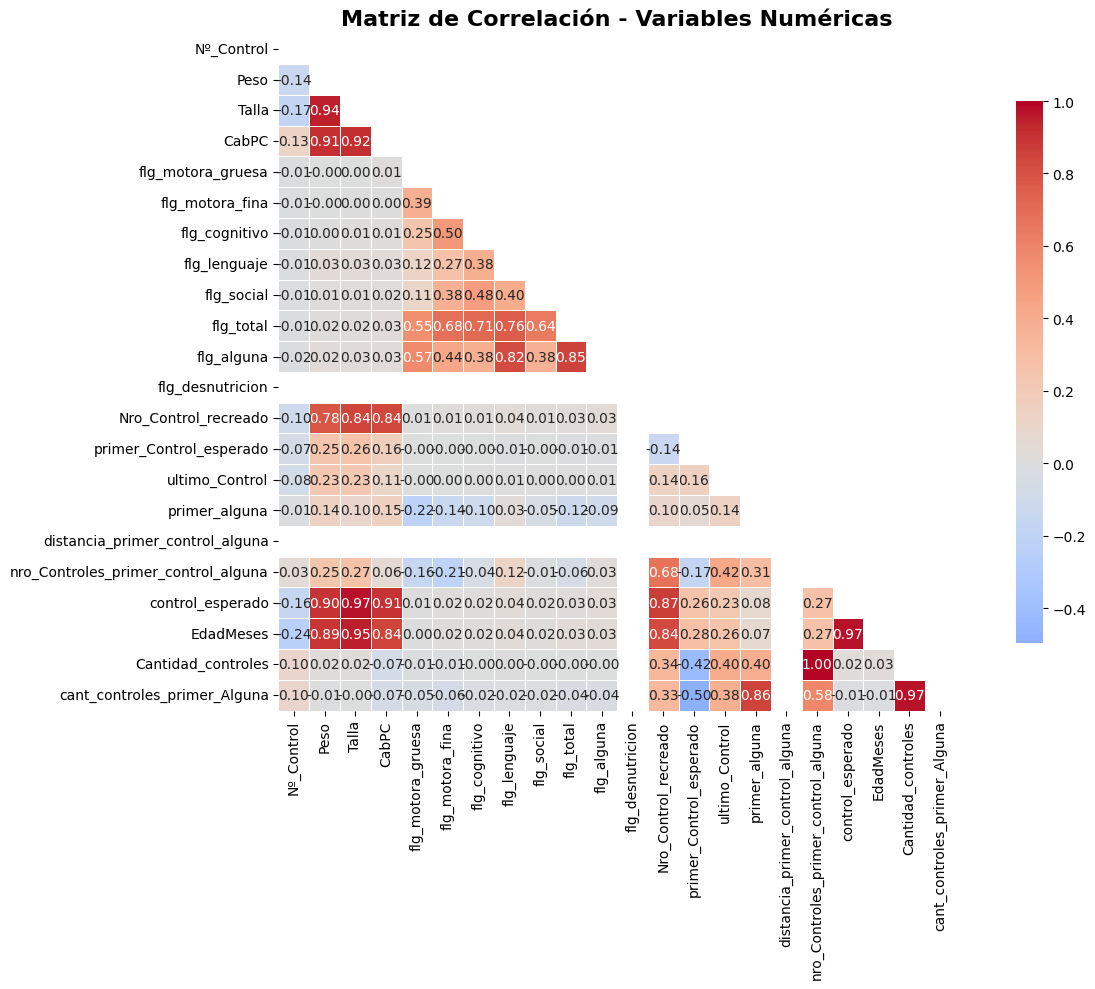


CORRELACIONES MÁS FUERTES CON EL TARGET (flg_alguna)
flg_total: 0.848 (positiva)
flg_lenguaje: 0.823 (positiva)
flg_motora_gruesa: 0.568 (positiva)
flg_motora_fina: 0.439 (positiva)
flg_cognitivo: 0.383 (positiva)
flg_social: 0.376 (positiva)
primer_alguna: 0.095 (negativa)
cant_controles_primer_Alguna: 0.039 (negativa)
Nro_Control_recreado: 0.035 (positiva)
EdadMeses: 0.034 (positiva)


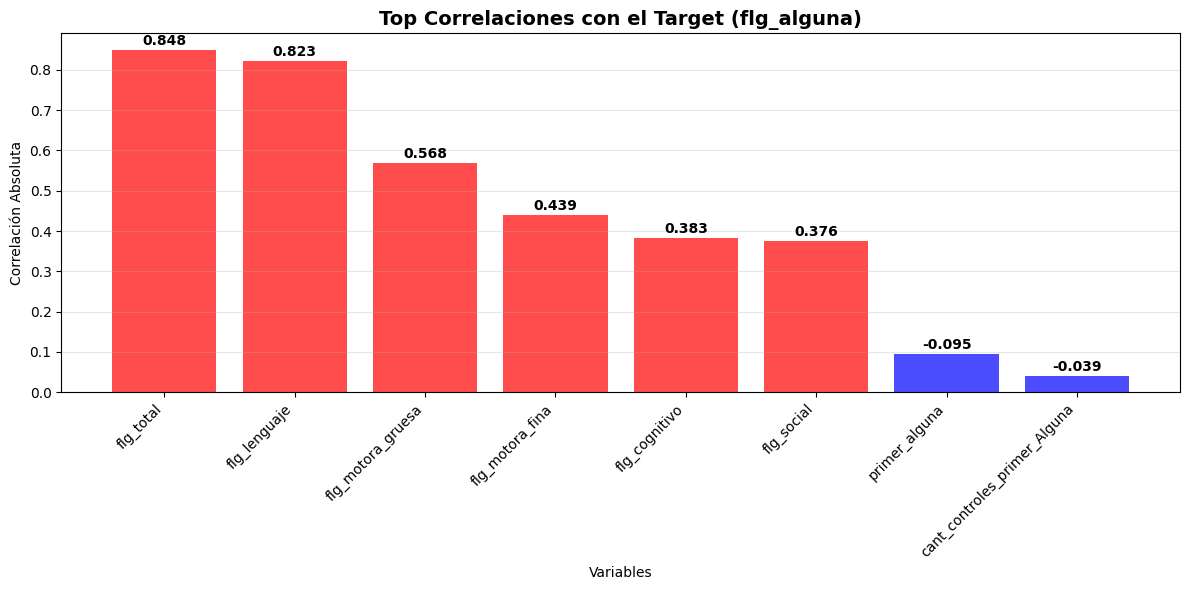

In [93]:
# Ejecutar análisis de correlaciones
correlation_analysis(df)

In [58]:
def bivariate_target_analysis(df):
    print("="*60)
    print("ANÁLISIS BIVARIADO CON EL TARGET (flg_alguna)")
    print("="*60)
    
    # 1. Variables categóricas vs Target
    categorical_vars = ['Sexo', 'Tipo_Paciente', 'Categoría', 'Diag_Nacimiento', 
                       '(M) - FG', '(M) - FF', '(C) - Cog', '(L) - Len', '(S) - Soc']
    
    available_cats = [var for var in categorical_vars if var in df.columns]
    
    # Chi-cuadrado para variables categóricas
    from scipy.stats import chi2_contingency
    
    print("\n1. ANÁLISIS CHI-CUADRADO: Variables Categóricas vs Target")
    print("-" * 60)
    
    significant_cats = []
    
    for var in available_cats:
        # Crear tabla de contingencia
        contingency = pd.crosstab(df[var], df['flg_alguna'], dropna=False)
        
        # Solo si hay suficientes observaciones
        if contingency.sum().sum() > 50 and contingency.shape[0] > 1 and contingency.shape[1] > 1:
            try:
                chi2, p_value, dof, expected = chi2_contingency(contingency)
                
                print(f"{var}:")
                print(f"  Chi2: {chi2:.3f}, p-value: {p_value:.4f}")
                
                if p_value < 0.05:
                    print(f"  *** SIGNIFICATIVO (p < 0.05) ***")
                    significant_cats.append(var)
                else:
                    print(f"  No significativo")
                print()
                
            except:
                print(f"{var}: Error en cálculo (datos insuficientes)")
                print()
    
    # 2. Visualización de variables categóricas significativas
    if significant_cats:
        n_significant = len(significant_cats)
        fig, axes = plt.subplots((n_significant + 1) // 2, 2, figsize=(16, 6 * ((n_significant + 1) // 2)))
        
        if n_significant == 1:
            axes = [axes]
        elif n_significant == 2:
            axes = axes.reshape(1, -1)
        else:
            axes = axes.flatten()
        
        for i, var in enumerate(significant_cats[:len(axes)]):
            # Tabla de contingencia con porcentajes
            cont_table = pd.crosstab(df[var], df['flg_alguna'], normalize='index') * 100
            
            if 0 in cont_table.columns and 1 in cont_table.columns:
                # Ordenar por porcentaje de déficit (columna 1)
                cont_table = cont_table.sort_values(by=1, ascending=False)
                
                cont_table.plot(kind='bar', ax=axes[i], color=['lightgreen', 'lightcoral'])
                axes[i].set_title(f'{var} vs Target\n(Chi2 significativo)', fontweight='bold')
                axes[i].set_ylabel('Porcentaje')
                axes[i].set_xlabel(var)
                axes[i].legend(['Normal (0)', 'Déficit (1)'])
                axes[i].tick_params(axis='x', rotation=45)
                axes[i].grid(axis='y', alpha=0.3)
        
        # Ocultar ejes sobrantes
        for j in range(len(significant_cats), len(axes)):
            axes[j].set_visible(False)
        
        plt.suptitle('Variables Categóricas con Asociación Significativa al Target', fontsize=16)
        plt.tight_layout()
        plt.show()
    
    # 3. Variables numéricas vs Target
    numeric_vars = ['EdadMeses', 'Peso', 'Talla', 'CabPC', 'Nº_Control', 'Cantidad_controles']
    available_nums = [var for var in numeric_vars if var in df.columns and df[var].notna().sum() > 100]
    
    if available_nums:
        print(f"\n2. ANÁLISIS NUMÉRICO: Variables Continuas vs Target")
        print("-" * 60)
        
        # T-test para variables numéricas
        from scipy.stats import ttest_ind
        
        significant_nums = []
        
        for var in available_nums:
            # Dividir en grupos según target
            group_0 = df[df['flg_alguna'] == 0][var].dropna()
            group_1 = df[df['flg_alguna'] == 1][var].dropna()
            
            if len(group_0) > 10 and len(group_1) > 5:  # Mínimo para t-test
                try:
                    t_stat, p_value = ttest_ind(group_0, group_1)
                    
                    mean_0 = group_0.mean()
                    mean_1 = group_1.mean()
                    
                    print(f"{var}:")
                    print(f"  Media Normal (0): {mean_0:.2f} (n={len(group_0)})")
                    print(f"  Media Déficit (1): {mean_1:.2f} (n={len(group_1)})")
                    print(f"  Diferencia: {mean_1 - mean_0:.2f}")
                    print(f"  T-test p-value: {p_value:.4f}")
                    
                    if p_value < 0.05:
                        print(f"  *** DIFERENCIA SIGNIFICATIVA ***")
                        significant_nums.append(var)
                    else:
                        print(f"  No significativo")
                    print()
                    
                except:
                    print(f"{var}: Error en cálculo")
                    print()
        
        # Visualización de variables numéricas significativas
        if significant_nums:
            fig, axes = plt.subplots(1, len(significant_nums), figsize=(6*len(significant_nums), 6))
            
            if len(significant_nums) == 1:
                axes = [axes]
            
            for i, var in enumerate(significant_nums):
                # Box plot comparativo
                data_to_plot = []
                labels = []
                
                for target_val in [0, 1]:
                    data = df[df['flg_alguna'] == target_val][var].dropna()
                    if len(data) > 0:
                        data_to_plot.append(data)
                        labels.append(f'Target {target_val}')
                
                if len(data_to_plot) >= 2:
                    bp = axes[i].boxplot(data_to_plot, labels=labels, patch_artist=True)
                    bp['boxes'][0].set_facecolor('lightgreen')
                    bp['boxes'][1].set_facecolor('lightcoral')
                    
                    axes[i].set_title(f'{var} por Target\n(Diferencia significativa)', fontweight='bold')
                    axes[i].set_ylabel(var)
                    axes[i].grid(axis='y', alpha=0.3)
            
            plt.suptitle('Variables Numéricas con Diferencias Significativas por Target', fontsize=16)
            plt.tight_layout()
            plt.show()

ANÁLISIS BIVARIADO CON EL TARGET (flg_alguna)

1. ANÁLISIS CHI-CUADRADO: Variables Categóricas vs Target
------------------------------------------------------------
Sexo:
  Chi2: 39.936, p-value: 0.0000
  *** SIGNIFICATIVO (p < 0.05) ***

Tipo_Paciente:
  Chi2: 32798.163, p-value: 0.0000
  *** SIGNIFICATIVO (p < 0.05) ***

Categoría:
  Chi2: 5536.681, p-value: 0.0000
  *** SIGNIFICATIVO (p < 0.05) ***

Diag_Nacimiento:
  Chi2: 1520.864, p-value: 0.0000
  *** SIGNIFICATIVO (p < 0.05) ***

(M) - FG:
  Chi2: 356088.533, p-value: 0.0000
  *** SIGNIFICATIVO (p < 0.05) ***

(M) - FF:
  Chi2: 38718.990, p-value: 0.0000
  *** SIGNIFICATIVO (p < 0.05) ***

(C) - Cog:
  Chi2: 308960.725, p-value: 0.0000
  *** SIGNIFICATIVO (p < 0.05) ***

(L) - Len:
  Chi2: 451629.256, p-value: 0.0000
  *** SIGNIFICATIVO (p < 0.05) ***

(S) - Soc:
  Chi2: 306645.028, p-value: 0.0000
  *** SIGNIFICATIVO (p < 0.05) ***



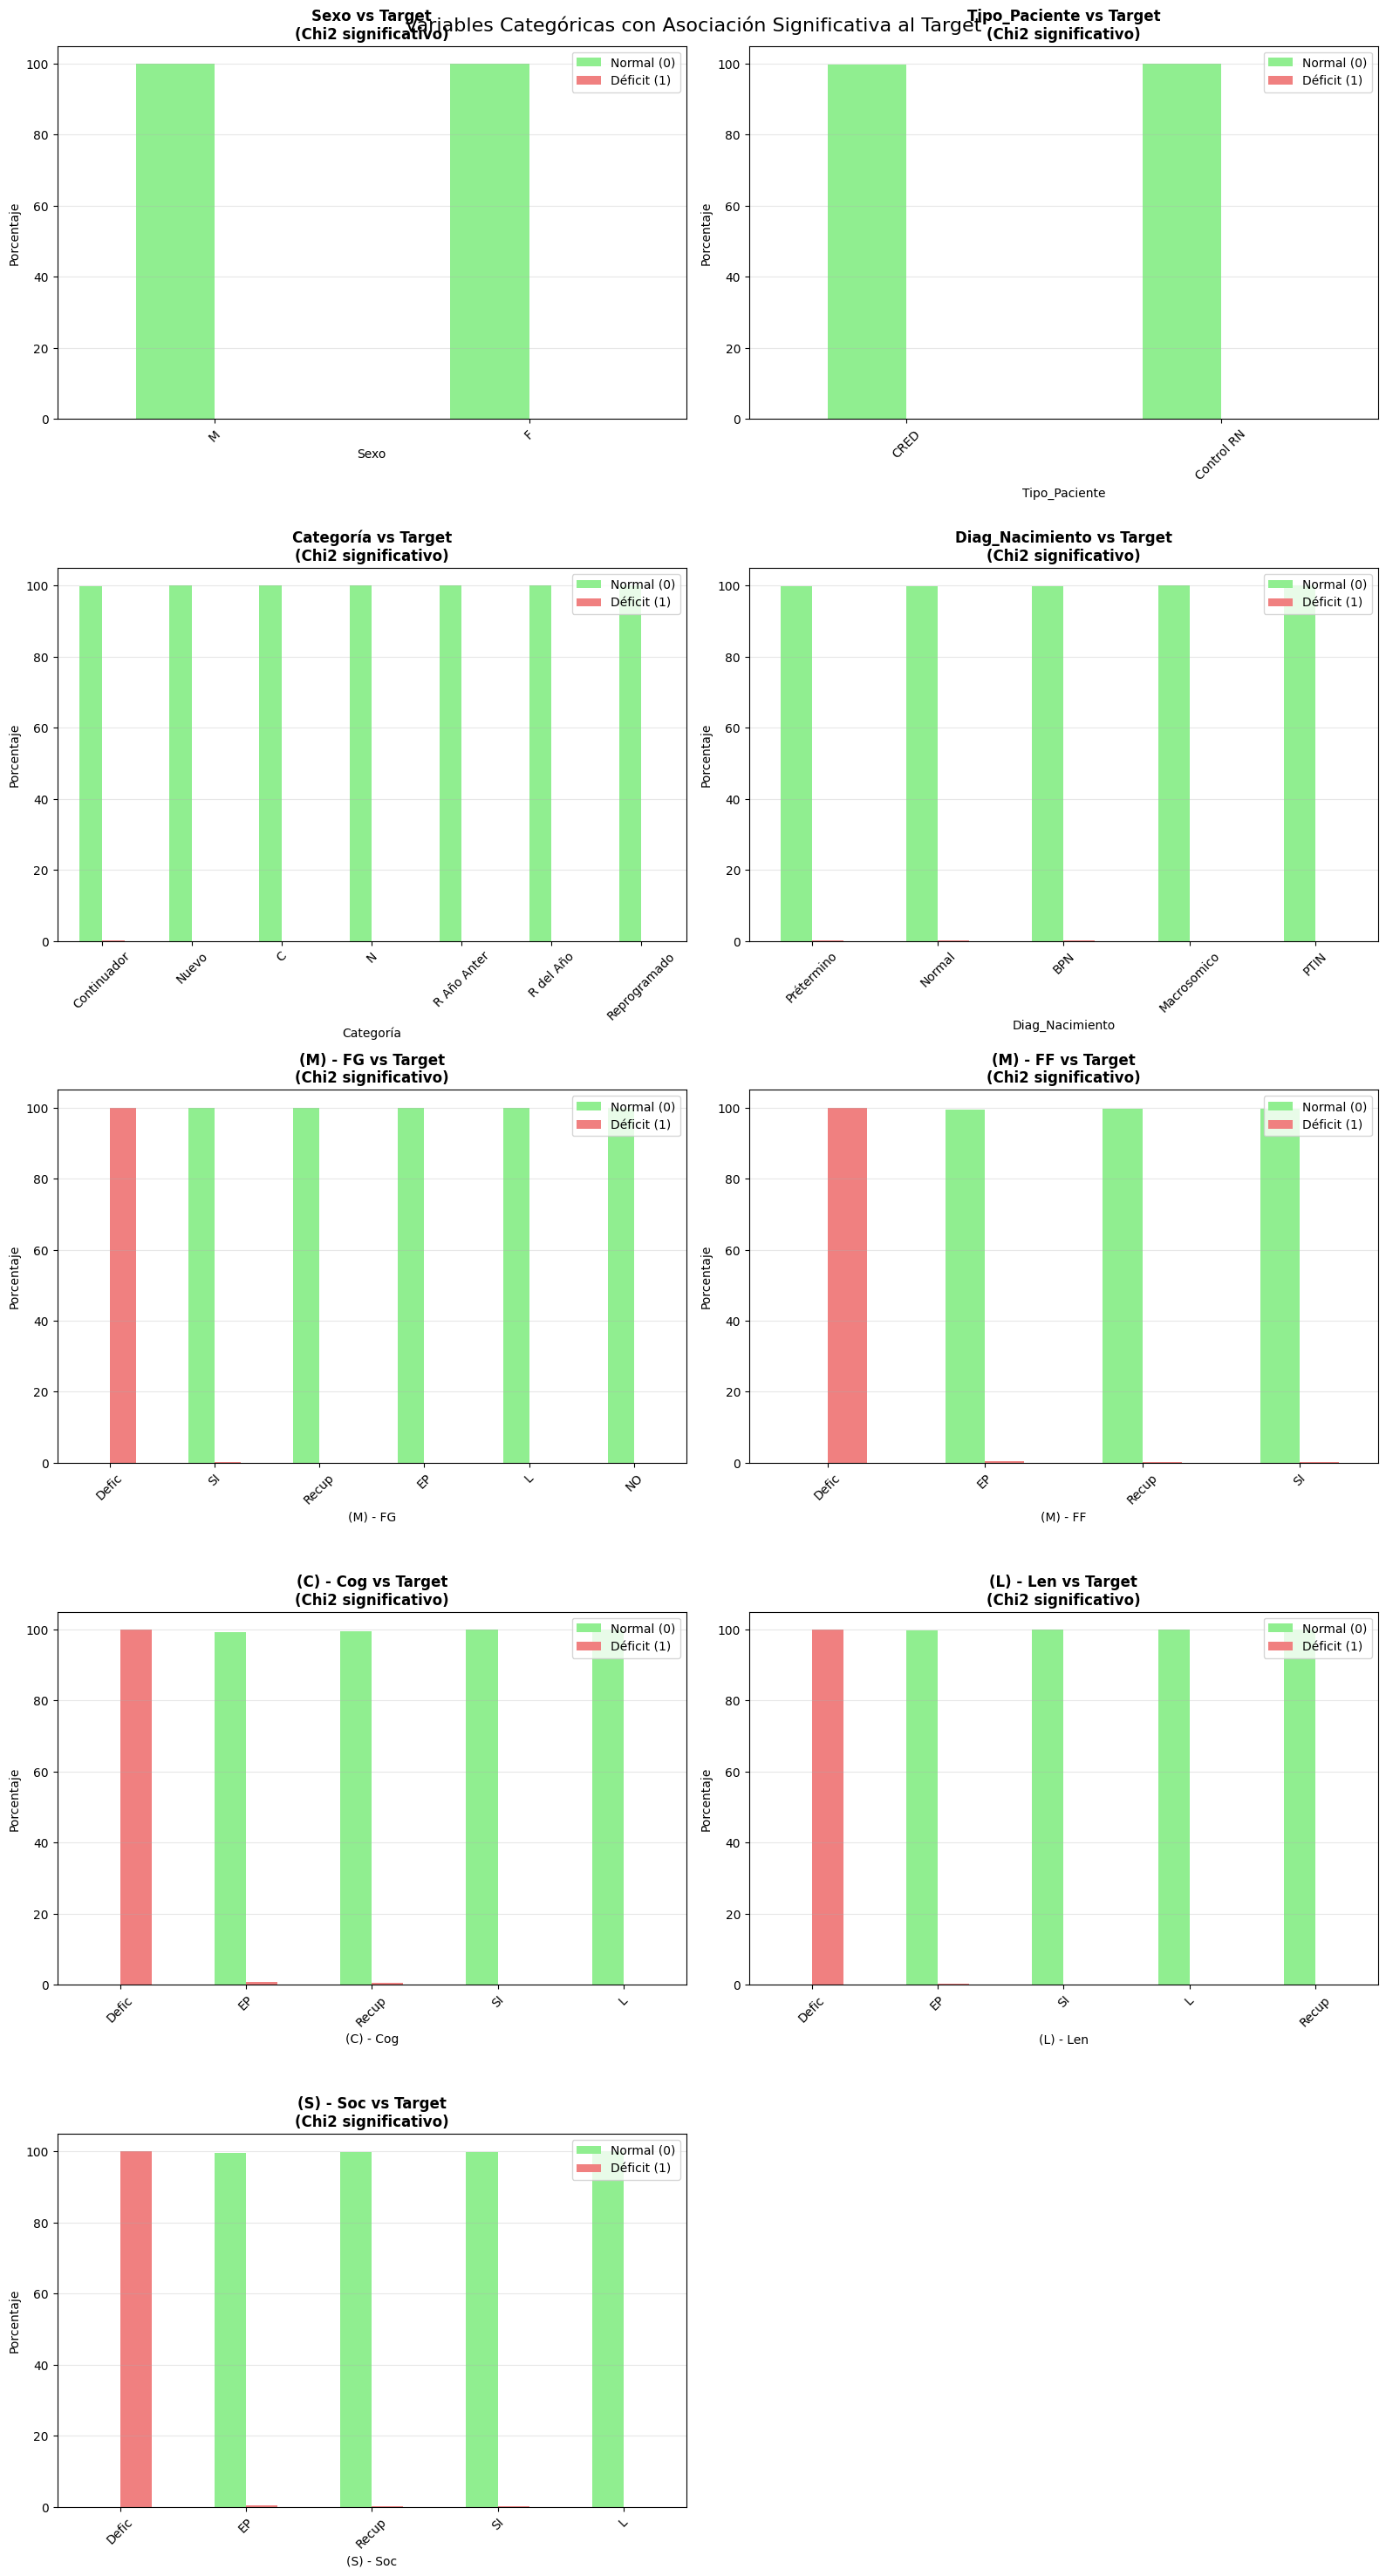


2. ANÁLISIS NUMÉRICO: Variables Continuas vs Target
------------------------------------------------------------
EdadMeses:
  Media Normal (0): 17.79 (n=262087)
  Media Déficit (1): 30.18 (n=347)
  Diferencia: 12.39
  T-test p-value: 0.0000
  *** DIFERENCIA SIGNIFICATIVA ***

Peso:
  Media Normal (0): 10.77 (n=262066)
  Media Déficit (1): 13.17 (n=347)
  Diferencia: 2.40
  T-test p-value: 0.0000
  *** DIFERENCIA SIGNIFICATIVA ***

Talla:
  Media Normal (0): 77.33 (n=262052)
  Media Déficit (1): 87.58 (n=347)
  Diferencia: 10.26
  T-test p-value: 0.0000
  *** DIFERENCIA SIGNIFICATIVA ***

CabPC:
  Media Normal (0): 44.26 (n=149251)
  Media Déficit (1): 47.07 (n=222)
  Diferencia: 2.81
  T-test p-value: 0.0000
  *** DIFERENCIA SIGNIFICATIVA ***

Nº_Control:
  Media Normal (0): 4.12 (n=262086)
  Media Déficit (1): 2.96 (n=347)
  Diferencia: -1.16
  T-test p-value: 0.0000
  *** DIFERENCIA SIGNIFICATIVA ***

Cantidad_controles:
  Media Normal (0): 21.68 (n=262087)
  Media Déficit (1): 21.4

/var/folders/6y/25yxj2990rj329z1dj8hc6vr0000gn/T/ipykernel_16133/4124013363.py:140: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[i].boxplot(data_to_plot, labels=labels, patch_artist=True)
/var/folders/6y/25yxj2990rj329z1dj8hc6vr0000gn/T/ipykernel_16133/4124013363.py:140: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[i].boxplot(data_to_plot, labels=labels, patch_artist=True)
/var/folders/6y/25yxj2990rj329z1dj8hc6vr0000gn/T/ipykernel_16133/4124013363.py:140: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[i].boxplot(data_to_plot, labels=labels, patch_artist=True)
/var/folders/6y/25yxj2990rj3

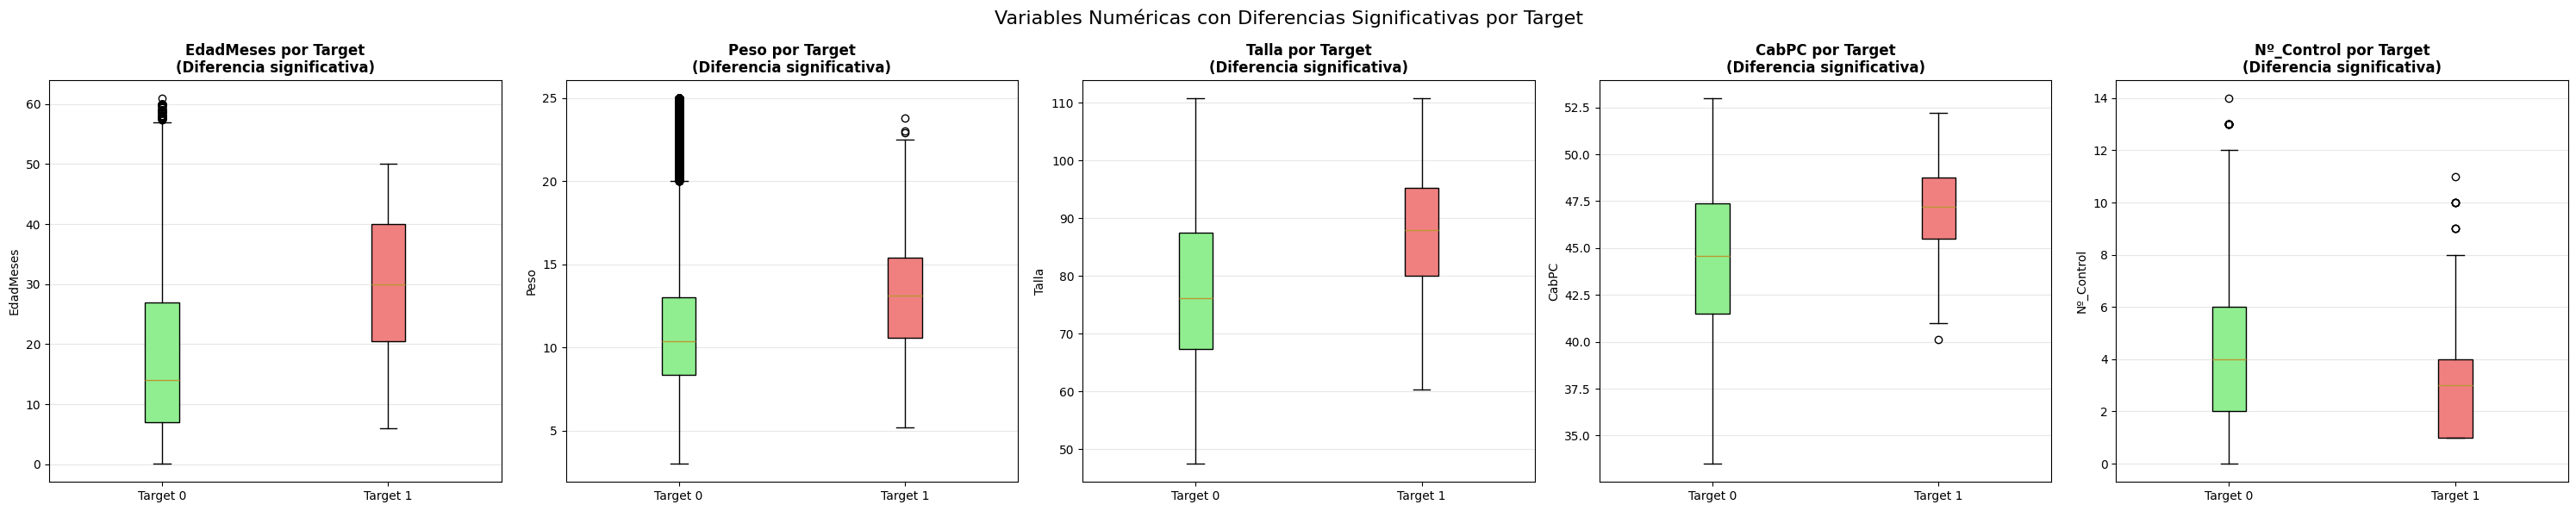

In [94]:
# Ejecutar análisis bivariado
bivariate_target_analysis(df)